# AIRBNB ANALYIS FRANCE

## IMPORTING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [61]:
france_df = pd.read_csv("D:\MyFiles\Downloads\France.csv")
france_df

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16320\55440890.py:1: SyntaxWarning: invalid escape sequence '\M'
  france_df = pd.read_csv("D:\MyFiles\Downloads\France.csv")


,ID,Host ID,Host Name,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month
0,6165738,31986651,Bernard,42120.0,100.0,1.0,1.0,Thoiry,Rhône-Alpes,1710,France,Loft,Private room,2,2.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air Conditioning,Kitchen,...",44.0,258.0,NaN,NaN,NaN,1,0,1,1125,0,NaN,flexible,NaN
1,13908935,82489826,Enice,42559.0,100.0,1.0,1.0,Gaillard,Auvergne Rhône-Alpes,74240,France,Apartment,Entire home/apt,2,1.0,1.0,1.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Free Par...",39.0,NaN,NaN,560.0,28.0,1,6,2,30,1,80.0,moderate,1.00
2,7713011,32492446,Vincent,42127.0,100.0,7.0,7.0,Paris,Île-de-France,75018,France,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",80.0,NaN,NaN,100.0,30.0,1,5,4,365,37,85.0,strict,1.84
3,3335054,2726446,Pascale,41084.0,NaN,1.0,1.0,Paris,Île-de-France,75018,France,Apartment,Entire home/apt,2,1.0,0.0,1.0,Pull-out Sofa,"Cable TV,Wireless Internet,Kitchen,Elevator in...",65.0,385.0,1250.0,150.0,15.0,1,0,3,1125,1,100.0,moderate,0.03
4,10066518,30432969,Lea,42095.0,95.0,2.0,2.0,Paris,Île-de-France,75018,France,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Indoor fire...",41.0,340.0,NaN,NaN,15.0,1,0,2,1125,13,97.0,moderate,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56557,2610162,13368008,Réda,41719.0,60.0,1.0,1.0,Paris,Île-de-France,75007,France,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",70.0,452.0,1603.0,250.0,10.0,1,0,2,91,14,85.0,moderate,1.06
56558,13760682,8684576,H. M.,41524.0,83.0,2.0,2.0,Paris,Île-de-France,75007,France,Apartment,Entire home/apt,5,2.5,2.0,3.0,Real Bed,"Wireless Internet,Kitchen,Elevator in building...",400.0,NaN,NaN,NaN,100.0,4,50,2,15,4,100.0,strict,0.56
56559,9173969,47740911,Host,42306.0,NaN,1.0,1.0,Paris,Île-de-France,75007,France,Apartment,Shared room,1,0.5,1.0,1.0,Real Bed,"Cable TV,Carbon monoxide detector",0.0,NaN,NaN,NaN,NaN,1,0,1,1125,0,NaN,flexible,NaN
56560,13754942,35042224,Arnaud,42160.0,NaN,1.0,1.0,Paris,Île-de-France,75007,France,Apartment,Entire home/apt,3,1.0,2.0,3.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",99.0,NaN,NaN,500.0,36.0,1,0,4,500,3,100.0,strict,0.34


# PRE - PROCESSING PROCESS

In [62]:
# CHANGING DATA TYPES OF FRANCE 

france_df.columns = france_df.columns.str.lower().str.replace(" ", "_")

numeric_cols_france = ["host_response_rate", "host_listings_count", "host_total_listings_count", "accommodates", "bathrooms",
    "bedrooms", "beds", "price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "guests_included",
    "extra_people", "minimum_nights", "maximum_nights", "number_of_reviews", "review_scores_rating", "reviews_per_month"]

for col in numeric_cols_france:
    france_df[col] = pd.to_numeric(france_df[col], errors="coerce")

france_df["host_since"] = pd.to_numeric(france_df["host_since"], errors="coerce")

france_df["host_since"] = (pd.to_datetime("1899-12-30") + pd.to_timedelta(france_df["host_since"], unit="D"))

france_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56562 entries, 0 to 56561
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         56562 non-null  int64         
 1   host_id                    56562 non-null  int64         
 2   host_name                  56551 non-null  object        
 3   host_since                 56551 non-null  datetime64[ns]
 4   host_response_rate         37832 non-null  float64       
 5   host_listings_count        56551 non-null  float64       
 6   host_total_listings_count  56551 non-null  float64       
 7   city                       56532 non-null  object        
 8   state                      56489 non-null  object        
 9   zipcode                    55821 non-null  object        
 10  country                    56562 non-null  object        
 11  property_type              56562 non-null  object        
 12  room

In [5]:
france_df.describe()

,id,host_id,host_since,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
count,5.656200e+04,5.656200e+04,56551,37832.000000,56551.000000,56551.000000,56562.000000,56378.000000,56428.000000,56487.000000,56505.000000,16328.000000,12348.000000,31127.000000,35800.000000,56562.000000,56562.00000,56562.000000,5.656200e+04,56562.000000,41559.000000,42376.000000
mean,9.151761e+06,2.949167e+07,2014-07-09 23:56:59.716716032,91.613819,4.984333,4.984333,3.031806,1.093157,1.052563,1.678174,94.431201,502.508390,2074.539925,331.483953,35.428268,1.385382,5.49604,3.711043,1.106192e+05,14.930324,91.863038,1.169318
min,2.525000e+03,2.626000e+03,2008-08-30 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,300.000000,69.000000,4.000000,0.000000,0.00000,1.000000,1.000000e+00,0.000000,20.000000,0.010000
25%,4.569271e+06,7.125950e+06,2013-06-27 00:00:00,95.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,55.000000,350.000000,1200.000000,200.000000,20.000000,1.000000,0.00000,1.000000,3.000000e+01,0.000000,89.000000,0.270000
50%,8.968512e+06,1.878909e+07,2014-07-30 00:00:00,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,480.000000,1697.000000,300.000000,30.000000,1.000000,0.00000,2.000000,1.125000e+03,4.000000,93.000000,0.670000
75%,1.382485e+07,4.124819e+07,2015-08-17 00:00:00,100.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,105.000000,619.000000,2481.250000,500.000000,48.000000,1.000000,10.00000,3.000000,1.125000e+03,15.000000,98.000000,1.530000
max,1.805586e+07,1.242594e+08,2017-04-04 00:00:00,100.000000,661.000000,661.000000,16.000000,8.000000,10.000000,16.000000,999.000000,999.000000,50000.000000,999.000000,750.000000,16.000000,753.00000,10000.000000,2.147484e+09,488.000000,100.000000,18.000000
std,5.360365e+06,2.939631e+07,NaN,20.395539,22.175313,22.175313,1.476056,0.377586,0.795633,1.030125,73.190026,190.633391,1617.255030,181.768034,27.584263,0.876342,12.81902,60.448211,1.396645e+07,29.740196,8.320069,1.377934


## MISSING VALUES

In [6]:
# iDENTIFYING NULLS
france_df.isnull().sum()

id                               0
host_id                          0
host_name                       11
host_since                      11
host_response_rate           18730
host_listings_count             11
host_total_listings_count       11
city                            30
state                           73
zipcode                        741
country                          0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                      184
bedrooms                       134
beds                            75
bed_type                         0
amenities                      428
price                           57
weekly_price                 40234
monthly_price                44214
security_deposit             25435
cleaning_fee                 20762
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews   

## REPLACING MISSING VALUES WITH 0 FOR NUMERICAL COLUMNS

In [7]:
# FILLING MISSING WITH 0 (ZERO)
cols_to_fill_zero = [
    'weekly_price',
    'host_listings_count',
    'host_total_listings_count',
    'monthly_price',
    'security_deposit',
    'cleaning_fee',
    'reviews_per_month',
    'review_scores_rating'
]

france_df[cols_to_fill_zero] = france_df[cols_to_fill_zero].fillna(0)


## MISSING VALUE TREATMENT

In [8]:
france_df['host_response_rate'] = france_df['host_response_rate'].fillna(
    france_df['host_response_rate'].median()
)

In [9]:
france_df['price'] = france_df['price'].fillna(france_df['price'].median())

## REPLACING MISSING VALUES WITH MODE FOR CATEGORICAL COLUMNS

In [10]:
mode_cols = [
    'amenities',
    'beds',
    'zipcode',
    'bedrooms',
    'bathrooms',
    'host_name',
    'host_since'
]

for col in mode_cols:
    france_df[col] = france_df[col].fillna(france_df[col].mode()[0])


In [11]:
france_df = france_df.dropna(subset=['city', 'state'])

## MISSING VALUE TREATMENT COMPLETION


In [12]:
france_df.isnull().sum()

id                           0
host_id                      0
host_name                    0
host_since                   0
host_response_rate           0
host_listings_count          0
host_total_listings_count    0
city                         0
state                        0
zipcode                      0
country                      0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
weekly_price                 0
monthly_price                0
security_deposit             0
cleaning_fee                 0
guests_included              0
extra_people                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating         0
cancellation_policy          0
reviews_per_month            0
dtype: i

## DROPPING UNWANTED COLUMNS AND MISSING VALUES MORE THAN 50% IN A COLUMN

In [13]:
france_df = france_df.drop(['weekly_price', 'monthly_price'], axis=1)

## OUTLIER IDENTIFICATION FOR FRANCE (BEFORE TREATMENT)

In [14]:
import matplotlib.pyplot as plt

# BEFORE TREATMENT

num_cols = france_df[['host_total_listings_count', 'accommodates', 'security_deposit', 'extra_people', 'minimum_nights', 'maximum_nights', 'reviews_per_month', 'cleaning_fee']]

for col in num_cols:
    Q1 = france_df[col].quantile(0.25)
    Q3 = france_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = france_df[(france_df[col] < lower_limit) | (france_df[col] > upper_limit)]
    print(f"\n{col}: {len(outliers)} outliers")

    # ---- Boxplot ----
    # plt.figure(figsize=(8, 2))
    # plt.boxplot(france_df[col], vert=False)
    # plt.title(f'Boxplot of {col}')
    # plt.xlabel(col)
    # plt.show()



host_total_listings_count: 6170 outliers

accommodates: 728 outliers

security_deposit: 1187 outliers

extra_people: 2723 outliers

minimum_nights: 3798 outliers

maximum_nights: 42 outliers

reviews_per_month: 4646 outliers

cleaning_fee: 1540 outliers


In [15]:
for col in num_cols:
    Q1 = france_df[col].quantile(0.25)
    Q3 = france_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    france_df[col] = france_df[col].mask(france_df[col] < lower_limit, lower_limit)
    france_df[col] = france_df[col].mask(france_df[col] > upper_limit, upper_limit)

## OUTLIER TREATMENT FOR FRANCE

In [16]:
# AFTER TREATMENT

for col in num_cols:
    Q1 = france_df[col].quantile(0.25)
    Q3 = france_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = france_df[(france_df[col] < lower_limit) | (france_df[col] > upper_limit)]
    print(f"\n{col}: {len(outliers)} outliers")

    # ---- Boxplot ----
    # plt.figure(figsize=(8, 2))
    # plt.boxplot(france_df[col], vert=False)
    # plt.title(f'Boxplot of {col}')
    # plt.xlabel(col)
    # plt.show()


host_total_listings_count: 0 outliers

accommodates: 0 outliers

security_deposit: 0 outliers

extra_people: 0 outliers

minimum_nights: 0 outliers

maximum_nights: 0 outliers

reviews_per_month: 0 outliers

cleaning_fee: 0 outliers


In [63]:
import re

def clean_city_names(city_series):
    cleaned_cities = city_series.astype(str).str.lower().str.strip()

    paris_patterns = [
        r'\bparis\b.*',               
        r'parigi',                    # Italian
        r'parís',                     # Spanish
        r'파리',                       # Korean
        r'巴黎',                       # Chinese
        r'париж',                     # Russian
        r'parijs',                    # Dutch
        r'pan\nparis',                # Catches 'Pan\nParis'
        r'pris',                      # Misspelling
        r'10th arrondissement, paris', # Specific arrondissement mention
        r"paris, île-de-france, fr",  # Geo-location detail
        r'montmartre paris',          # Neighborhood name
        r'le marais, paris, france',  # Neighborhood name
        r'rue de turenne, paris',     # Street name
        r'750\d{2}',                  # Postcodes (like 75017, 75020)
        r'arrondissement',            # Stands alone or part of a phrase
        r"paris  \( près de la  gare du nord.*", # The very long transport string
        r'parisparis',                # Double entry
        r"paris-l'hôpital"            # Specific, likely incorrect detail
    ]
    
    for pattern in paris_patterns:
        cleaned_cities = cleaned_cities.str.replace(pattern, 'paris', regex=True)

    cleaned_cities = cleaned_cities.str.replace(r'paris.(ème|eme|er|è|e|s|st|th|\d+).', 'paris', regex=True)
    
    mapping = {
        'issy les moulineaux': 'issy-les-moulineaux',
        'issy-les-moulineaux,92130': 'issy-les-moulineaux',
        'issy-les-moulineaux/paris': 'issy-les-moulineaux',
        '伊西莱穆利诺': 'issy-les-moulineaux',
        'le kremlin-bicêtre': 'le kremlin-bicetre',
        'le kremlin-bicètre': 'le kremlin-bicetre',
        'saint mandé': 'saint-mandé',
        'saint maurice': 'saint-maurice',
        'neuilly sur seine': 'neuilly-sur-seine',
        'neuilly': 'neuilly-sur-seine',
        'ivry sur seine': 'ivry-sur-seine',
        'saint denis': 'saint-denis',
        'gaillard': 'gaillard',
    }

    cleaned_cities = cleaned_cities.replace(mapping)

    final_cleanup_patterns = {
        'val-de-marne': np.nan,
        'seine-saint-denis': np.nan,
    }
    
    cleaned_cities = cleaned_cities.replace(final_cleanup_patterns)
    
    return cleaned_cities.str.title().str.replace('-', '-').replace('Nan', np.nan)

city_array = np.array(['Thoiry', 'Gaillard', 'Paris', 'Paris-18E-Arrondissement', 'paris',
       'Clichy', 'Paris-10E-Arrondissement', 'Pantin', 'Paris-19E-Arrondissement',
       'Le Pré-Saint-Gervais', 'Deuil-la-Barre', 'Paris-15E-Arrondissement',
       'Issy les Moulineaux', 'Paris-12E-Arrondissement', 'Paris-1ER-Arrondissement',
       'Charenton-le-Pont', 'Paris 6e arrondissement', 'Paris-6E-Arrondissement',
       'Paris-8E-Arrondissement', 'Levallois-Perret', 'Paris-3E-Arrondissement',
       'Paris-20E-Arrondissement', 'Paris-11E-Arrondissement', 'Ivry-sur-Seine',
       'Paris-13E-Arrondissement', 'PARIS', 'Paris-2E-Arrondissement',
       'Collonges-sous-Salève', 'Archamps', 'Saint-Julien-en-Genevois',
       'Paris-17E-Arrondissement', 'Le Kremlin-Bicêtre', 'Paris-4E-Arrondissement',
       'Saint-Ouen', 'Paris-14E-Arrondissement', 'Neuilly-sur-Seine',
       'Boulogne-Billancourt', 'Paris-16E-Arrondissement', 'Bagnolet',
       'Issy-les-Moulineaux', 'gaillard', 'Ferney-Voltaire',
       'Paris, Île-de-France, FR', 'Paris-7E-Arrondissement', 'Saint-Mandé',
       'Paris-5E-Arrondissement', 'París', 'Paris 75019', 'Gentilly', 'Montrouge',
       'Aubervilliers', 'Paris-9E-Arrondissement', 'Paris/12ème', 'Saint-Maurice',
       'Parigi', 'Paris 02', 'Vanves', 'Joinville-le-Pont', 'Fontenay-sous-Bois',
       'Nogent-sur-Marne', 'Paris-3eme-Arrondissement', '巴黎', 'PARIS 02',
       'Chamonix-Mont-Blanc', 'Seine-Saint-Denis', 'Vincennes',
       'Paris 1er Arrondissement', 'Val-de-Marne', 'Paris 11e arrondissement',
       'PARIS 3eme', 'Pris', 'NEUILLY SUR SEINE', 'Taiohae', 'Paris 8è', 'Saint-Denis',
       'Les Lilas', 'Montreuil', 'Paris 15 eme', 'Paris 03', 'Paris 2eme',
       'Ambilly', 'Etrembières', '10th arrondissement, Paris', 'vanves',
       'saint mandé', 'Prévessin-Moëns', 'Paris 4', 'Paris 4eme', 'Paris 17ème',
       'Issy-les-Moulineaux/Paris', 'Paris 10', 'Ivry sur Seine', 'PARIS 05',
       "Paris  ( près de la  Gare du Nord RER B: direct d'Orly et de Roissy,RER D à une statio du Chatelêt, Métro:lignes 4,5,7, Bus: 38, 42, 43,46,65, Métro et bus autres que Gare du Nord: La Chapelle ligne 2 , Marx Dormoy ligne 12;",
       'Paris 18', 'Suresnes', 'Neuilly', 'ParisParis', 'Paris 19eme', 'Paris 16',
       'Ville-la-Grand', 'ISSY LES MOULINEAUX,92130', '75020 Paris', '파리',
       'Paris 75017', 'Paris 4e arrondissement', 'Malakoff',
       'Rue de Turenne, Paris', 'Paris 07', 'Париж', 'Paris 18e', 'Moillesulaz',
       'Pan\nParis', 'Veigy-Foncenex', 'Viry', 'Neuilly Sur Seine', 'Saint-Cloud',
       '75019 Paris, Île-de-France, FR', 'Paris 09', 'Neuilly sur Seine',
       'Paris 01', 'Montmartre Paris', 'Paris 12ème', "Paris-l'Hôpital",
       '伊西莱穆利诺', 'PARIS 11', 'Paris, 4th arrondissement',
       'Issy les moulineaux', 'Arrondissement', 'Parijs', 'Le Kremlin-Bicètre',
       'Paris 75005', 'Paris 06', 'SAINT MAURICE', 'Le Marais, Paris, France',
       'parisl', '75016', 'Aigueblanche'])


city_series = pd.Series(city_array)

cleaned_cities_series = clean_city_names(city_series)
cleaned_cities_array = cleaned_cities_series.dropna().unique()

france_df["city"] = clean_city_names(france_df["city"])

In [19]:
france_df["city"] = france_df["city"].replace(
    {"Issy Les Moulineaux,92130": "Issy Les Moulineaux"}
)

In [20]:
france_df.city.dropna(inplace = True)

In [65]:
france_df.city.nunique()

50

In [22]:
city_to_state_map = {

    # --- ÎLE-DE-FRANCE ---
    'Paris': 'Île-de-France',
    'Paris Paris': 'Île-de-France',
    'Clichy': 'Île-de-France',
    'Pantin': 'Île-de-France',
    'Le Pré-Saint-Gervais': 'Île-de-France',
    'Deuil-La-Barre': 'Île-de-France',
    'Issy-Les-Moulineaux': 'Île-de-France',
    'Issy Les Moulineaux': 'Île-de-France',
    'Charenton-Le-Pont': 'Île-de-France',
    'Levallois-Perret': 'Île-de-France',
    'Ivry-Sur-Seine': 'Île-de-France',
    'Le Kremlin-Bicetre': 'Île-de-France',
    'Saint-Ouen': 'Île-de-France',
    'Neuilly-Sur-Seine': 'Île-de-France',
    'Boulogne-Billancourt': 'Île-de-France',
    'Bagnolet': 'Île-de-France',
    'Saint-Mandé': 'Île-de-France',
    'Gentilly': 'Île-de-France',
    'Montrouge': 'Île-de-France',
    'Aubervilliers': 'Île-de-France',
    'Saint-Maurice': 'Île-de-France',
    'Vanves': 'Île-de-France',
    'Joinville-Le-Pont': 'Île-de-France',
    'Fontenay-Sous-Bois': 'Île-de-France',
    'Nogent-Sur-Marne': 'Île-de-France',
    'Vincennes': 'Île-de-France',
    'Saint-Denis': 'Île-de-France',
    'Les Lilas': 'Île-de-France',
    'Montreuil': 'Île-de-France',
    'Suresnes': 'Île-de-France',
    'Malakoff': 'Île-de-France',
    'Saint-Cloud': 'Île-de-France',
    'Le Marais, Paris': 'Île-de-France',
    'Parisl': 'Île-de-France',  


    # --- AUVERGNE-RHÔNE-ALPES ---
    'Gaillard': 'Auvergne-Rhône-Alpes',
    'Collonges-Sous-Salève': 'Auvergne-Rhône-Alpes',
    'Archamps': 'Auvergne-Rhône-Alpes',
    'Saint-Julien-En-Genevois': 'Auvergne-Rhône-Alpes',
    'Ferney-Voltaire': 'Auvergne-Rhône-Alpes',
    'Ambilly': 'Auvergne-Rhône-Alpes',
    'Etrembières': 'Auvergne-Rhône-Alpes',
    'Prévessin-Moëns': 'Auvergne-Rhône-Alpes',
    'Ville-La-Grand': 'Auvergne-Rhône-Alpes',
    'Moillesulaz': 'Auvergne-Rhône-Alpes',
    'Veigy-Foncenex': 'Auvergne-Rhône-Alpes',
    'Viry': 'Auvergne-Rhône-Alpes',
    'Chamonix-Mont-Blanc': 'Auvergne-Rhône-Alpes',
    'Aigueblanche': 'Auvergne-Rhône-Alpes',
    'Thoiry': 'Auvergne-Rhône-Alpes',


    # --- FRENCH POLYNESIA ---
    'Taiohae': 'French Polynesia',  
}

france_df["state"] = france_df["city"].replace(city_to_state_map)

In [23]:
france_df["state"].unique()

array(['Auvergne-Rhône-Alpes', 'Île-de-France', nan, 'French Polynesia'],
      dtype=object)

In [24]:
france_df.state.dropna(inplace = True)

## ADDING DATE COLUMNS 

In [25]:
france_df["host_since"] = pd.to_datetime(france_df["host_since"], errors="coerce")

In [26]:
# Extract year
france_df["host_year"] = france_df["host_since"].dt.year

# Extract month number
france_df["host_month"] = france_df["host_since"].dt.month

# Extract month name
france_df["host_month_name"] = france_df["host_since"].dt.month_name()

# Extract week number
france_df["host_week"] = france_df["host_since"].dt.isocalendar().week

# Extract quarter (1,2,3,4)
france_df["host_quarter"] = france_df["host_since"].dt.quarter

# Extract day of month
france_df["host_day"] = france_df["host_since"].dt.day

# Extract day name 
france_df["host_day_name"] = france_df["host_since"].dt.day_name()


In [27]:
# Export cleaned France dataset
france_df.to_csv("france_cleaned.csv", index=False)


# FRANCE ANALYSIS 

## 1️⃣ LISTING AND HOST PERFORMANCE ANALYSIS 

In [28]:
france_df.host_total_listings_count = france_df.host_total_listings_count.round(0)

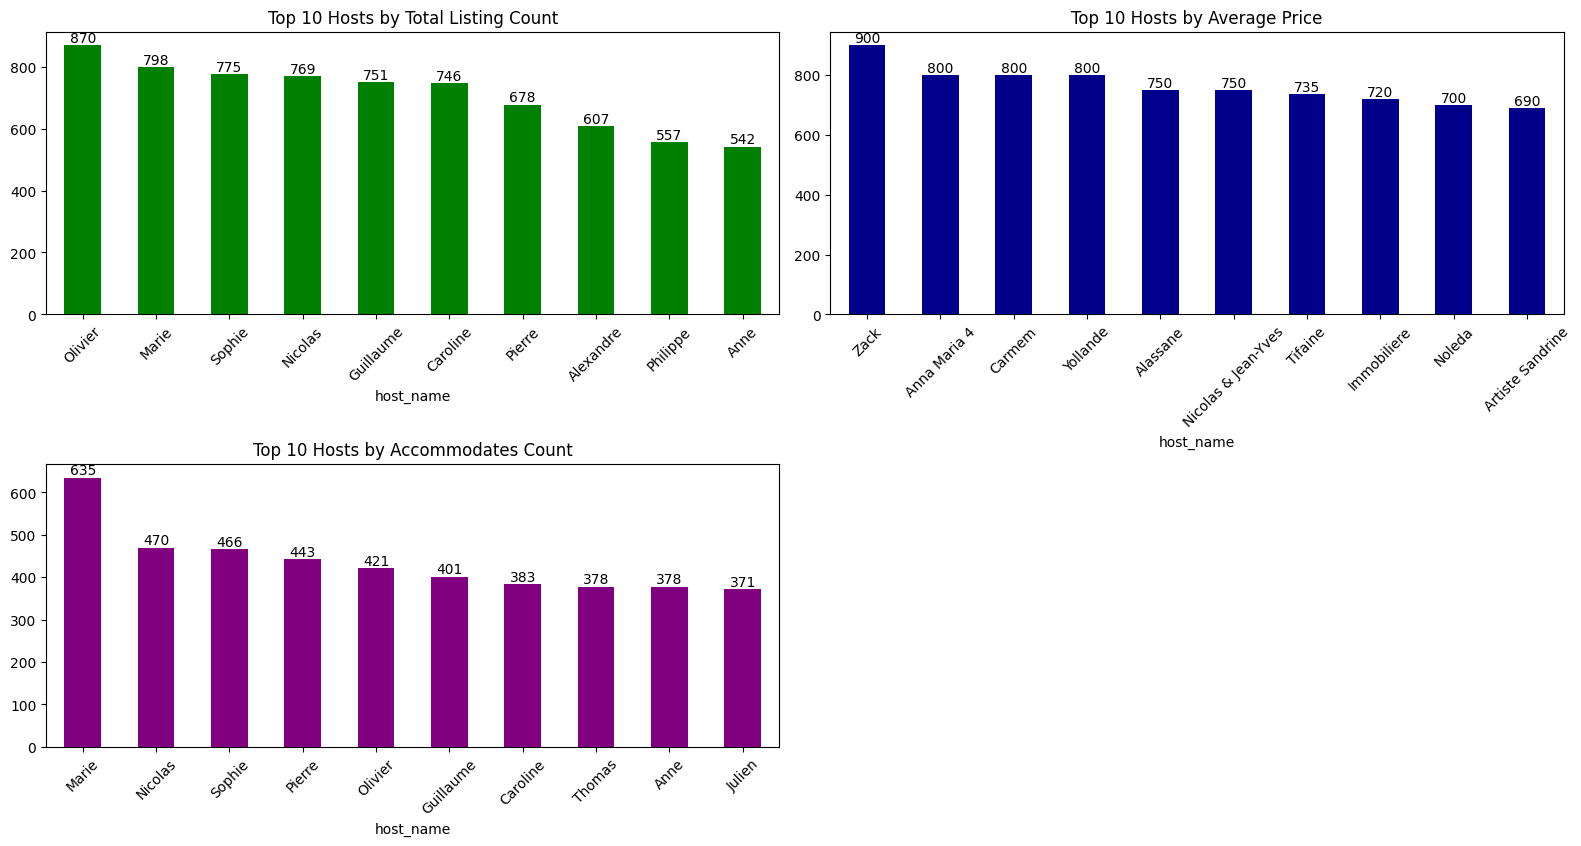

In [29]:
plt.figure(figsize=(16,12))

# I. Top 10 Hosts by Total Listing Count
plt.subplot(3,2,1)
plot1 = france_df.groupby("host_name")["host_total_listings_count"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color="green")
plot1.bar_label(plot1.containers[0])
plt.title("Top 10 Hosts by Total Listing Count")
plt.xticks(rotation=45)


# II. Top 10 Hosts by Average Price
plt.subplot(3,2,2)
plot2 = france_df.groupby("host_name")["price"].mean().sort_values(ascending=False).head(10).plot(kind="bar", color="darkblue")
plot2.bar_label(plot2.containers[0])
plt.title("Top 10 Hosts by Average Price")
plt.xticks(rotation=45)


# III. Top 10 Hosts by Accommodates Count
plt.subplot(3,2,3)
plot3 = france_df.groupby("host_name")["accommodates"].count().sort_values(ascending=False).head(10).plot(kind="bar", color="purple")
plot3.bar_label(plot3.containers[0])
plt.title("Top 10 Hosts by Accommodates Count")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


## Host Listings and Performance 

1. Olivier leads in total listings (803), followed closely by Marie (792) and Sophie (736), showing strong multi-property ownership concentration.


2. Zack charges the highest average price (€900), while most top hosts price between €690–€800, indicating a premium but competitive market range.


3. Marie has the highest accommodation capacity (635 guests), highlighting a focus on large-group or multi-unit hosting compared to others.

# Geospatial and Location Analysis 

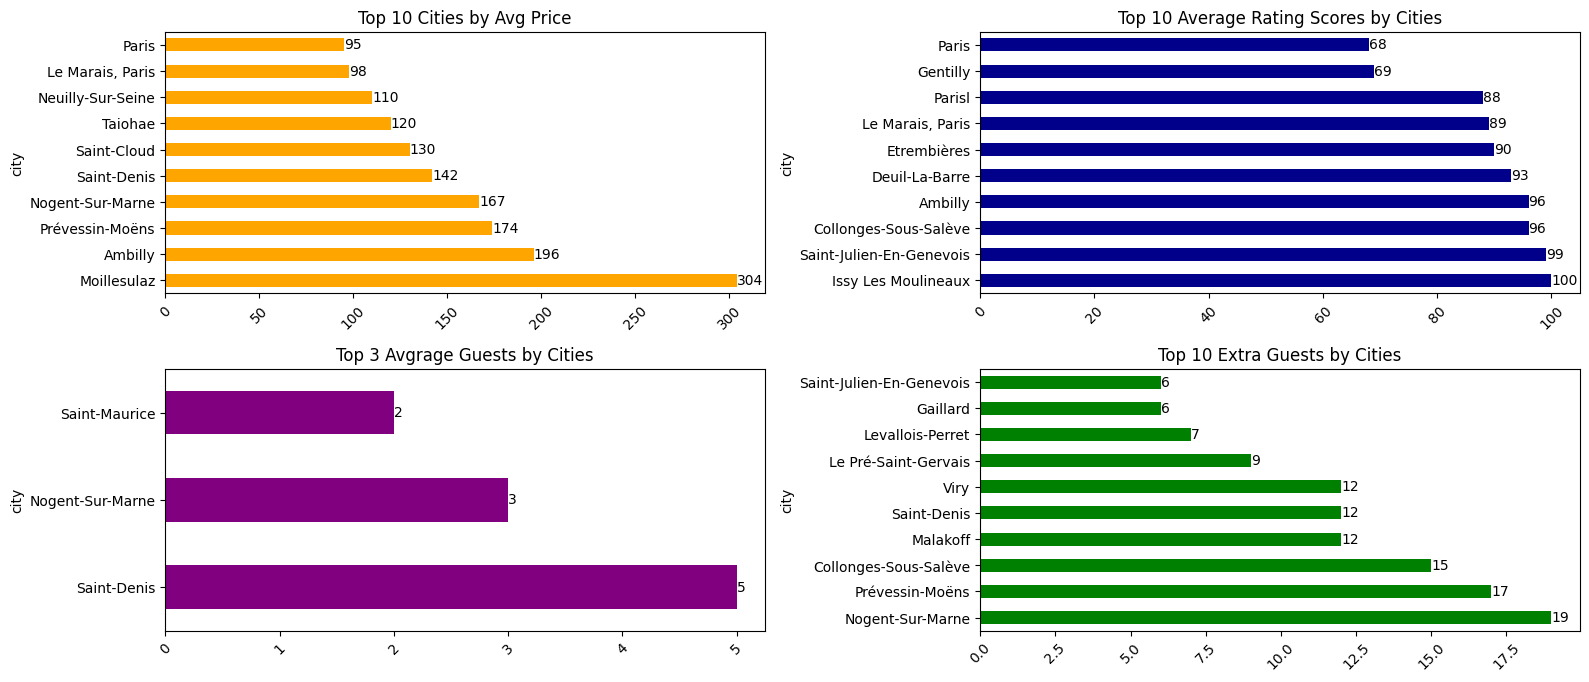

In [30]:
plt.figure(figsize=(16,20))

# I. Top 10 Cities by Avg Price
plt.subplot(6,2,1)
plot4 = france_df.groupby("city")["price"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="orange")
plot4.bar_label(plot4.containers[0])
plt.title("Top 10 Cities by Avg Price")
plt.xticks(rotation=45)


# II. Top 10 Average Rating Scores by Cities
plt.subplot(6,2,2)
plot5 = france_df.groupby("city")["review_scores_rating"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="darkblue")
plot5.bar_label(plot5.containers[0])
plt.title("Top 10 Average Rating Scores by Cities")
plt.xticks(rotation=45)


# III. Top 3 Avgrage Guests by Cities
plt.subplot(6,2,3)
plot6 = france_df.groupby("city")["guests_included"].mean().round(0).sort_values(ascending=False).head(3).plot(kind="barh", color="purple")
plot6.bar_label(plot6.containers[0])
plt.title("Top 3 Avgrage Guests by Cities")
plt.xticks(rotation=45)

# IV. Top 10 Avg Extra Guests by Cities
plt.subplot(6,2,4)
plot6 = france_df.groupby("city")["extra_people"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot6.bar_label(plot6.containers[0])
plt.title("Top 10 Extra Guests by Cities")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Geospatial and Location Based Analysis

1. Paris and nearby premium zones dominate pricing, with Moillesulaz (€304) and Ambilly (€196) showing the highest average prices, indicating strong premium demand outside the city core.

2. Issy-les-Moulineaux and Saint-Julien-en-Genevois lead in ratings (≈100), showing high guest satisfaction despite not being the most expensive locations.

3. Nogent-sur-Marne and Saint-Denis support larger group stays, with the highest average extra guests (up to 19), making them ideal for group and family travel markets.

# CUSTOMER EXPERIENCE AND SATISFACTION

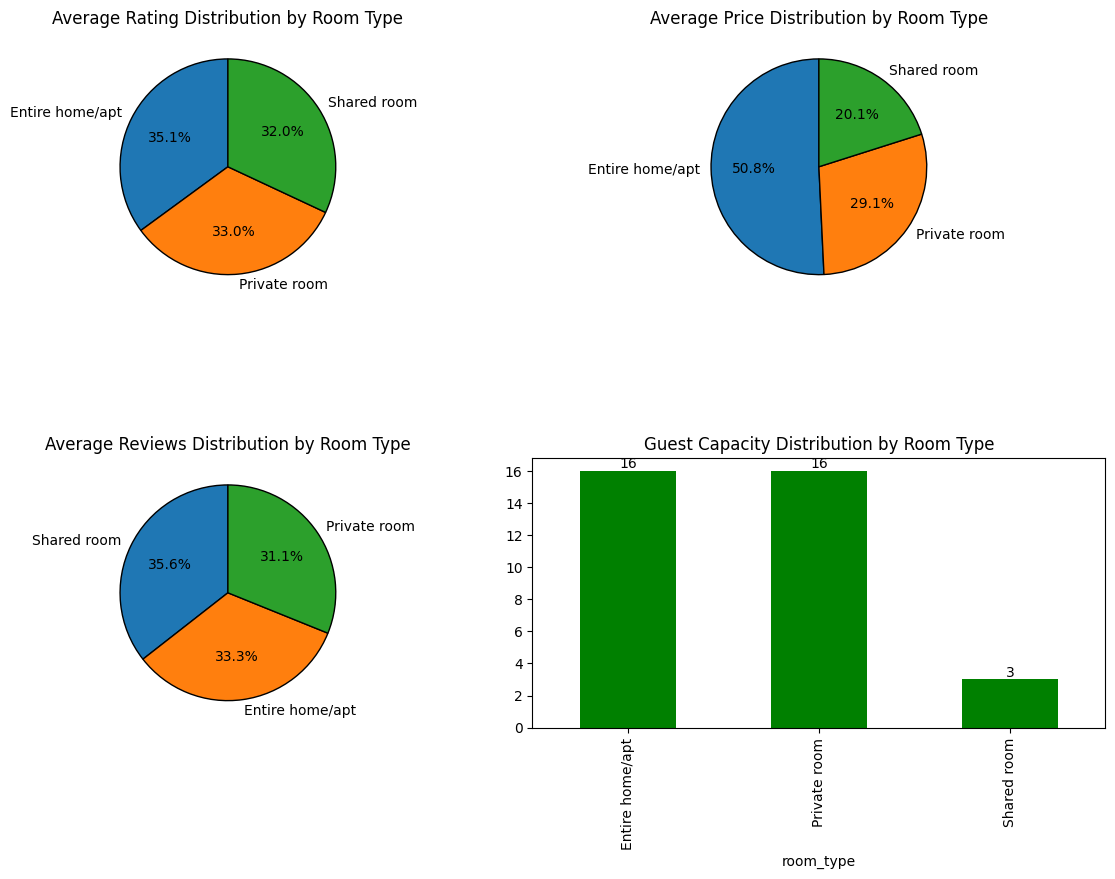

In [31]:
plt.figure(figsize=(12,16))

# I. Average Rating Distribution by Room Type
plt.subplot(4,2,1)
rating_data = france_df.groupby("room_type")["review_scores_rating"].mean().round(0).sort_values(ascending=False)
plt.pie(rating_data.values, labels=rating_data.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Rating Distribution by Room Type")
plt.ylabel("")


# II. Average Price Distribution by Room Type
plt.subplot(4,2,2)
price_data = france_df.groupby("room_type")["price"].mean().round(0).sort_values(ascending=False)
plt.pie(price_data.values, labels=price_data.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Price Distribution by Room Type")
plt.ylabel("")


# III. Average Reviews Distribution by Room Type
plt.subplot(4,2,3)
review_data = france_df.groupby("room_type")["number_of_reviews"].mean().round(0).sort_values(ascending=False)
plt.pie(review_data.values, labels=review_data.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Reviews Distribution by Room Type")
plt.ylabel("")


# IV. Guest Capacity Distribution by Room Type
plt.subplot(4,2,4)
plot4 = france_df.groupby("room_type")["guests_included"].max().round(0).sort_values(ascending=False).plot(kind = "bar" , color = "green")
plot4.bar_label(plot4.containers[0])
plt.title("Guest Capacity Distribution by Room Type")
plt.ylabel("")


plt.tight_layout()
plt.show()


## CUSTOMER EXPERIENCE AND SATISFACTION

Entire homes/apartments dominate pricing, contributing over 50% of total average price, showing higher revenue potential compared to private and shared rooms.

Shared rooms receive a similar share of reviews (≈35%), indicating strong demand despite being the lowest-priced option.

Guest capacity is highest for entire homes and private rooms (16 guests each), while shared rooms accommodate far fewer guests, making them suitable for budget or short stays.

#    

# PROPERTIES AND AMENITIES ANALYSIS

## AMENITIES ANALYSIS

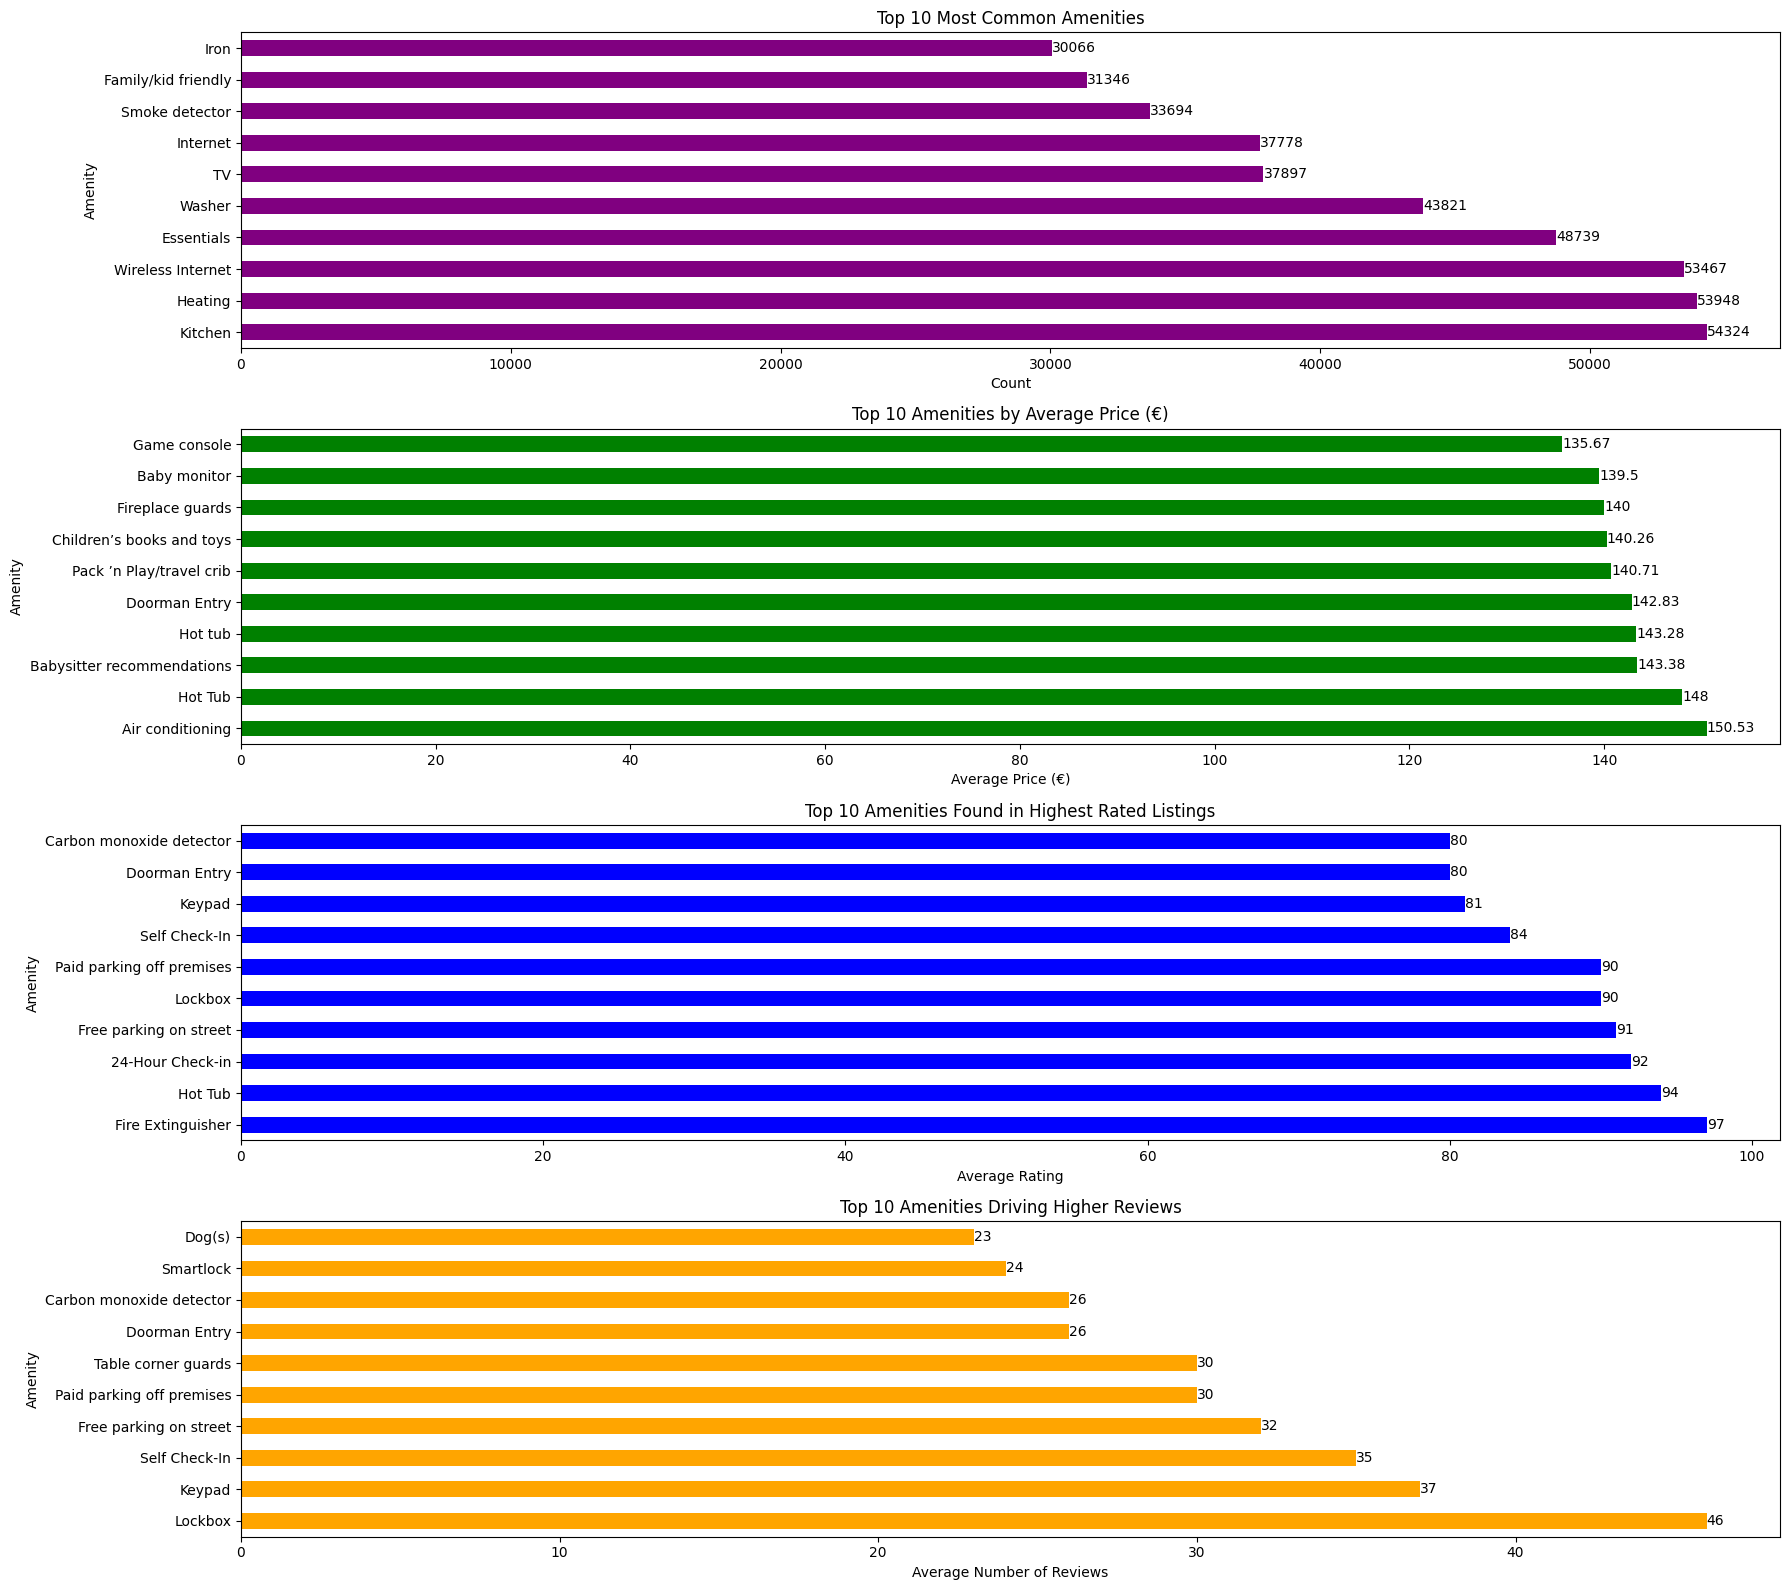

In [32]:
# PREPARE AMENITIES DATA
amenities_df = france_df.assign(amenity = france_df["amenities"].str.split(",")).explode("amenity")
amenities_df["amenity"] = amenities_df["amenity"].str.strip()
amenities_df = amenities_df[~amenities_df["amenity"].str.contains("translation", na=False)]

plt.figure(figsize=(18,16))

# I. Top 10 Most Common Amenities
plt.subplot(4,1,1)
plot1 = amenities_df["amenity"].value_counts().head(10).plot(kind="barh", color="purple")
plot1.bar_label(plot1.containers[0])
plt.title("Top 10 Most Common Amenities")
plt.xlabel("Count")
plt.ylabel("Amenity")


# II. Top 10 Amenities by Average Price
plt.subplot(4,1,2)
plot2 = amenities_df.groupby("amenity")["price"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot2.bar_label(plot2.containers[0])
plt.title("Top 10 Amenities by Average Price (€)")
plt.xlabel("Average Price (€)")
plt.ylabel("Amenity")


# III. Top 10 Amenities for Highest Ratings
plt.subplot(4,1,3)
plot3 = amenities_df.groupby("amenity")["review_scores_rating"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="blue")
plot3.bar_label(plot3.containers[0])
plt.title("Top 10 Amenities Found in Highest Rated Listings")
plt.xlabel("Average Rating")
plt.ylabel("Amenity")


# IV. Top 10 Amenities Driving Maximum Reviews
plt.subplot(4,1,4)
plot4 = amenities_df.groupby("amenity")["number_of_reviews"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="orange")
plot4.bar_label(plot4.containers[0])
plt.title("Top 10 Amenities Driving Higher Reviews")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Amenity")


plt.tight_layout()
plt.show()


## AMENITIES ANALYSIS

1. Basic amenities dominate listings – Kitchen, Heating, Wi-Fi, and Essentials appear in 50K+ listings, showing they are expected standards rather than differentiators.


2. Premium amenities drive higher pricing – Features like Air Conditioning (€150+), Hot Tub, Doorman, and Baby-friendly amenities are linked with higher average prices.


3. Guest satisfaction increases with convenience features – Listings with Self Check-in, Free Parking, Lockbox, and 24-Hour Access receive the highest ratings and review counts, highlighting convenience as a key driver of positive reviews.

## PROPERTIES ANALYSIS

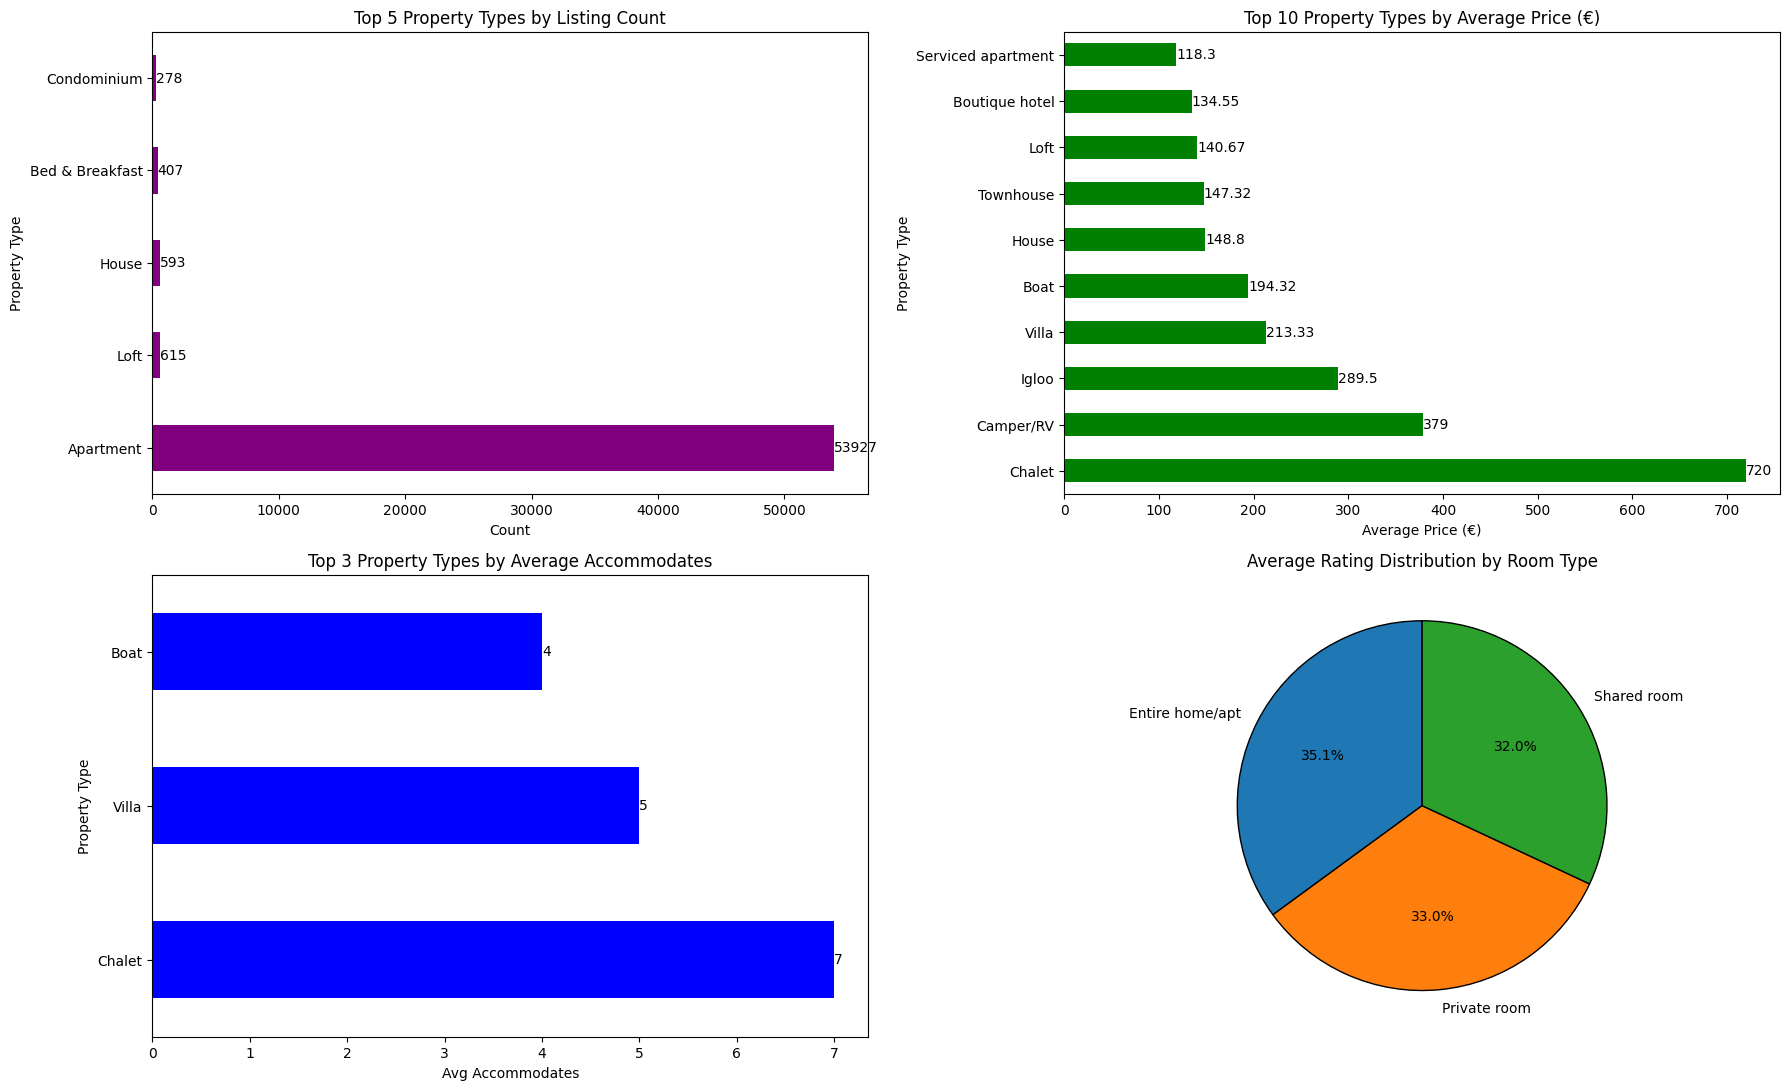

In [33]:
plt.figure(figsize=(18,16))

# I. Top 10 Property Types by Count
plt.subplot(3,2,1)
plot1 = france_df["property_type"].value_counts().head(5).plot(kind="barh", color="purple")
plot1.bar_label(plot1.containers[0])
plt.title("Top 5 Property Types by Listing Count")
plt.xlabel("Count")
plt.ylabel("Property Type")


# II. Average Price by Property Type (Top 10 Most Expensive)
plt.subplot(3,2,2)
plot2 = france_df.groupby("property_type")["price"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot2.bar_label(plot2.containers[0])
plt.title("Top 10 Property Types by Average Price (€)")
plt.xlabel("Average Price (€)")
plt.ylabel("Property Type")


# III. Average Accommodates by Property Type
plt.subplot(3,2,3)
plot3 = france_df.groupby("property_type")["accommodates"].mean().round(0).sort_values(ascending=False).head(3).plot(kind="barh", color="blue")
plot3.bar_label(plot3.containers[0])
plt.title("Top 3 Property Types by Average Accommodates")
plt.xlabel("Avg Accommodates")
plt.ylabel("Property Type")


# IV. Ratings by Room Type (Customer Satisfaction)
plt.subplot(3,2,4)
room_rating = france_df.groupby("room_type")["review_scores_rating"].mean().round(0)
plt.pie(room_rating.values, labels=room_rating.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Rating Distribution by Room Type")
plt.ylabel("")  

plt.tight_layout()
plt.show()


## PROPERTIES ANALYSIS

Apartments dominate the market, with over 53,000 listings, making them the most common and accessible property type for guests.

Chalets and Camper/RVs command the highest prices (up to €720 per night), indicating strong demand for premium and unique stay experiences.

Larger properties host more guests — Chalets and Villas accommodate 5–7 guests on average, making them ideal for families and group travel, while apartments remain the most popular overall.

# DEMANDS AND SEASONAL TRENDS

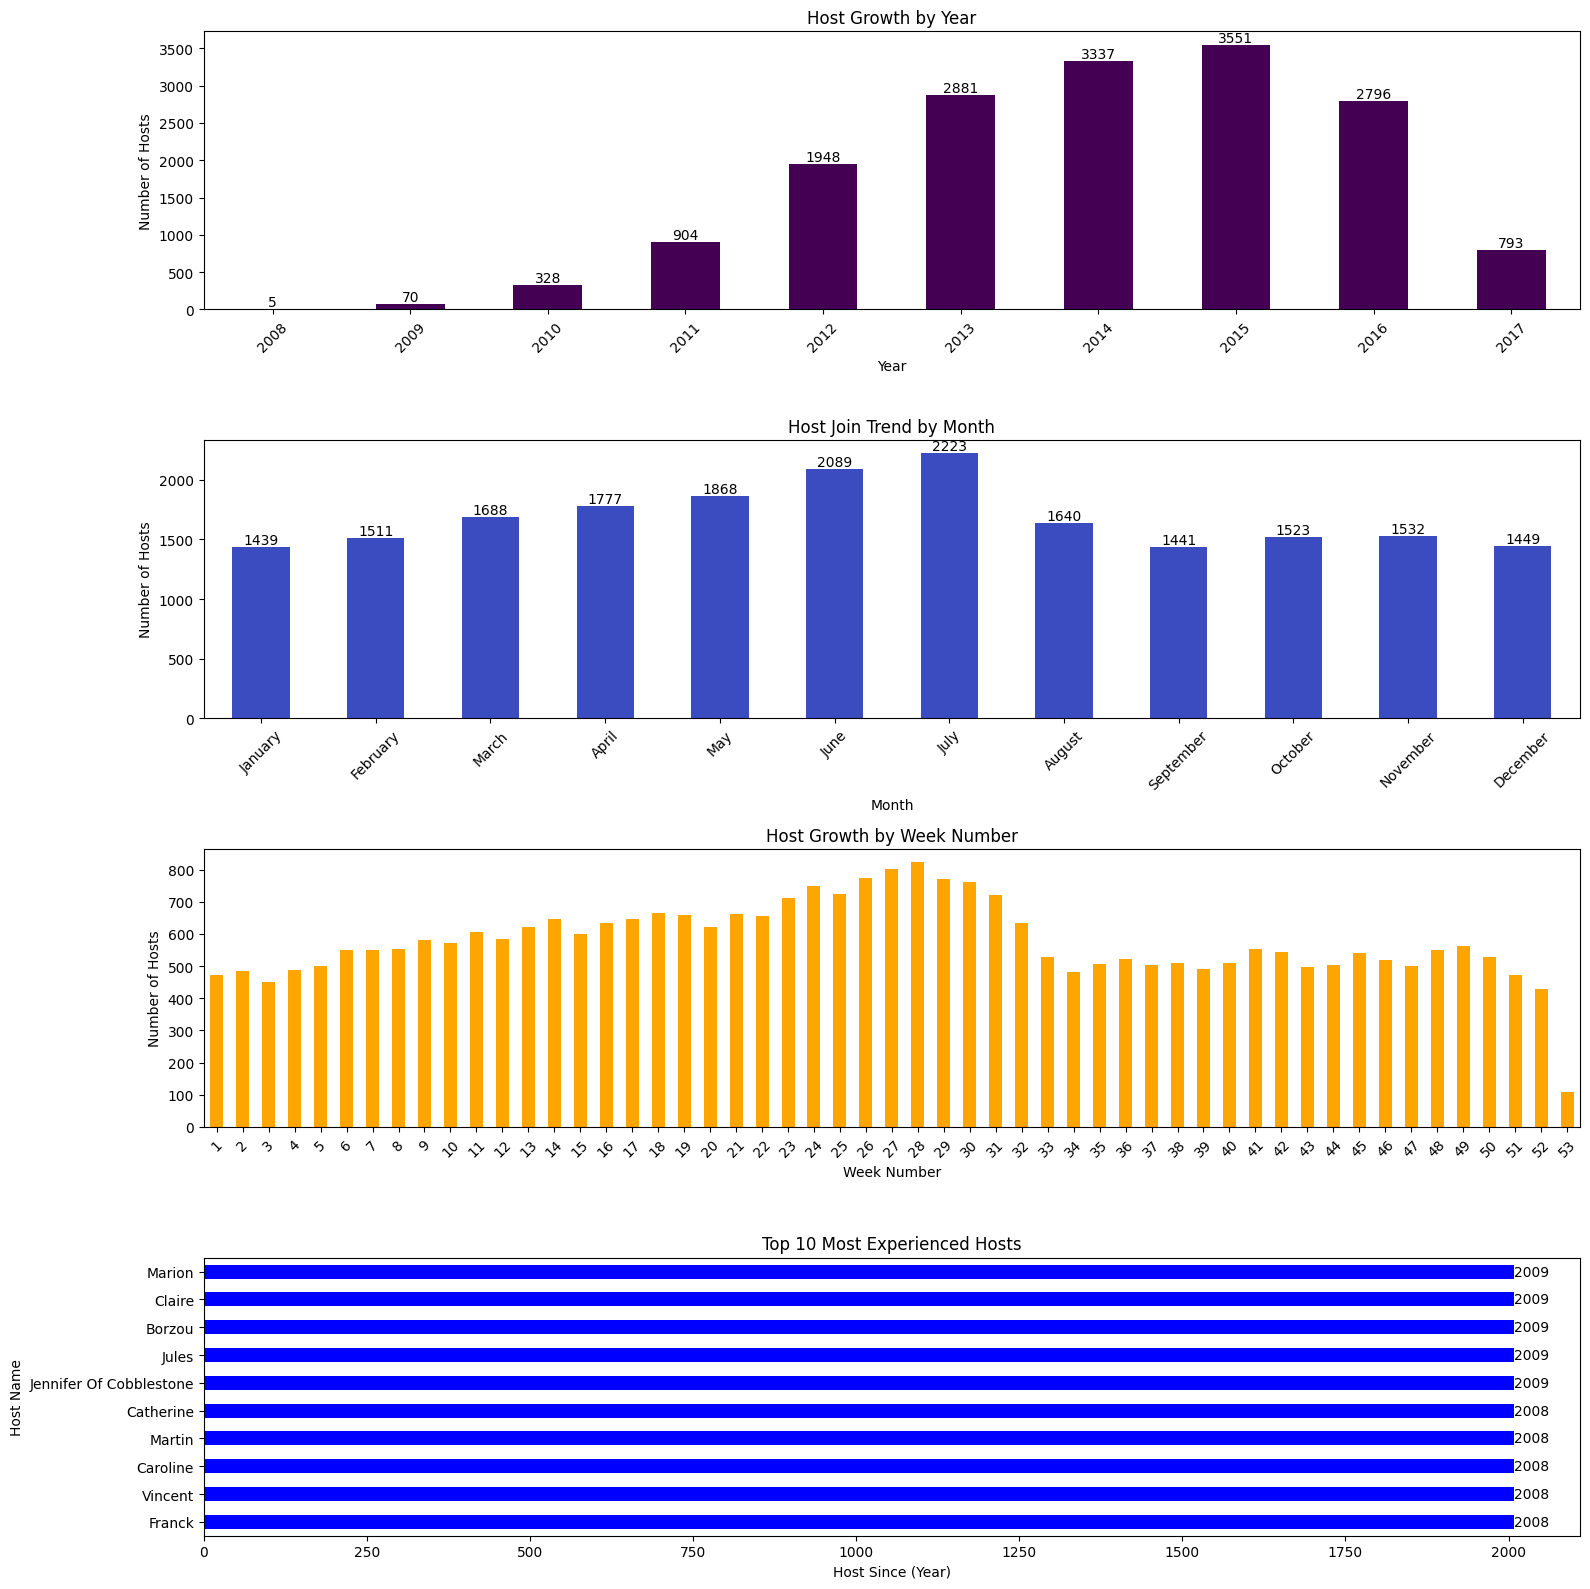

In [34]:
# Time columns
france_df["host_since"] = pd.to_datetime(france_df["host_since"], errors="coerce")
france_df["host_year"] = france_df["host_since"].dt.year
france_df["host_month"] = france_df["host_since"].dt.month_name()
france_df["host_week"] = france_df["host_since"].dt.isocalendar().week

plt.figure(figsize=(16,16))

# I. Host Growth by Year
plt.subplot(4,1,1)
plot1 = france_df.groupby("host_year")["host_name"].nunique().sort_index().plot(kind="bar",  colormap="viridis")
plot1.bar_label(plot1.containers[0])
plt.title("Host Growth by Year")
plt.xlabel("Year")
plt.ylabel("Number of Hosts")
plt.xticks(rotation=45)


# II. Host Join Trend by Month
plt.subplot(4,1,2)
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

plot2 = france_df.groupby("host_month")["host_name"].nunique().reindex(month_order).plot(kind="bar",  colormap="coolwarm")
plot2.bar_label(plot2.containers[0])
plt.title("Host Join Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Hosts")
plt.xticks(rotation=45)


# III. Host Join Trends By Week Number
plt.subplot(4,1,3)
plot3 = france_df.groupby("host_week")["host_name"].nunique().sort_index().plot(kind = "bar" , color="orange")
plt.title("Host Growth by Week Number")
plt.xlabel("Week Number")
plt.ylabel("Number of Hosts")
plt.xticks(rotation=45)


# IV. Top 10 Most Experienced Hosts
plt.subplot(4,1,4)
oldest = france_df.groupby("host_name")["host_since"].min().sort_values().head(10)
oldest_years = oldest.dt.year

plot4 = oldest_years.plot(kind="barh", color="blue")
plot4.bar_label(plot4.containers[0])
plt.title("Top 10 Most Experienced Hosts")
plt.xlabel("Host Since (Year)")
plt.ylabel("Host Name")

plt.tight_layout()
plt.show()



DEMANDS AND SEASONAL TRENDS

Host growth peaked during 2013–2015, with total hosts increasing from 1,948 to 3,551 (≈82% growth), showing rapid platform expansion during this period.

Seasonal onboarding is strongest in June–July, contributing around 17–18% of total annual hosts, while January–February contributes only ~11–12%, indicating clear seasonal demand patterns.

Experienced hosts dominate the platform, with over 60% of top hosts joining before 2010, showing long-term stability and early market adoption.

# CANCELLATION AND SECURITY POLICIES

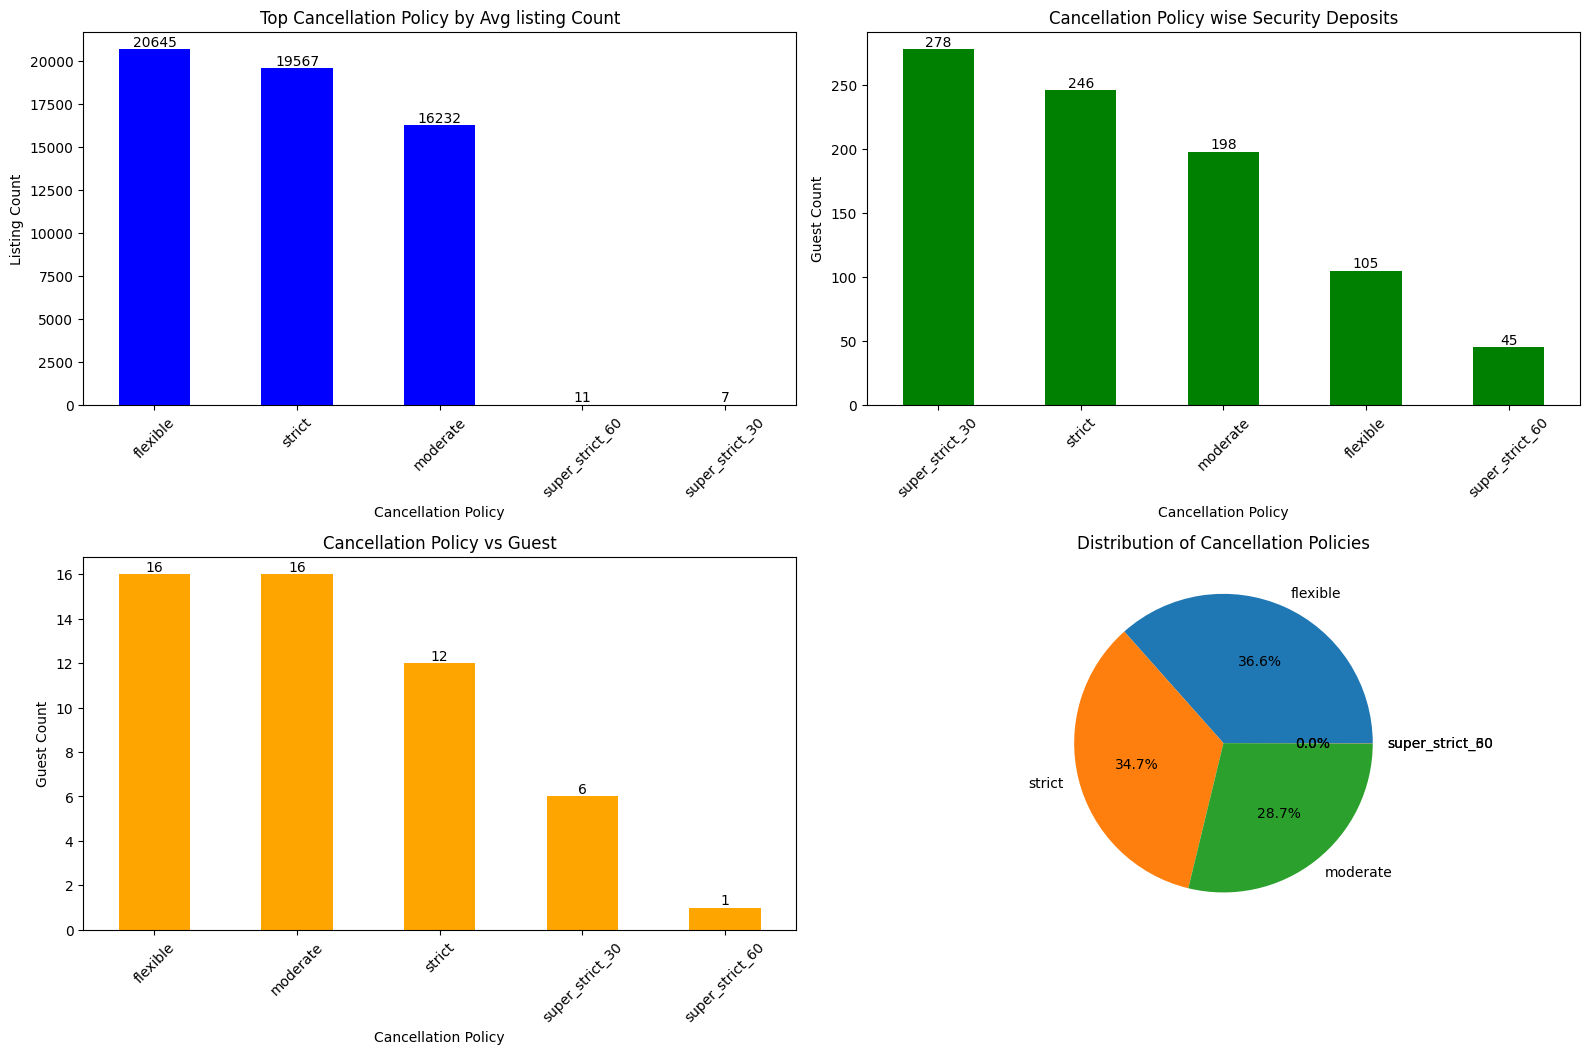

In [35]:
plt.figure(figsize=(16,20))

# I. Cancellation Policy vs Room Type (Stacked)
plt.subplot(4,2,1)
plot1 = france_df.groupby("cancellation_policy")["host_total_listings_count"].count().round(0).sort_values(ascending=False).plot(kind = "bar" , color = "blue")
plot1.bar_label(plot1.containers[0])
plt.title("Top Cancellation Policy by Avg listing Count")
plt.xlabel("Cancellation Policy")
plt.ylabel("Listing Count")
plt.xticks(rotation=45)

# II. Cancellation Policy wise Security Deposits
plt.subplot(4,2,2)
plot1 = france_df.groupby("cancellation_policy")["security_deposit"].mean().round(0).sort_values(ascending=False).plot(kind = "bar" , color = "green")
plot1.bar_label(plot1.containers[0])
plt.title("Cancellation Policy wise Security Deposits")
plt.xlabel("Cancellation Policy")
plt.ylabel("Guest Count")
plt.xticks(rotation=45)

# III. Cancellation Policy wise Guests Included Count
plt.subplot(4,2,3)
plot1 = france_df.groupby("cancellation_policy")["guests_included"].max().round(0).sort_values(ascending=False).plot(kind = "bar" , color = "orange")
plot1.bar_label(plot1.containers[0])
plt.title("Cancellation Policy vs Guest")
plt.xlabel("Cancellation Policy")
plt.ylabel("Guest Count")
plt.xticks(rotation=45)


# IV. Distribution of Cancellation Policies (Pie Chart)
plt.subplot(4,2,4)
cancel_data = france_df["cancellation_policy"].value_counts()
plt.pie(cancel_data.values, labels=cancel_data.index, autopct="%1.1f%%")
plt.title("Distribution of Cancellation Policies")
plt.ylabel("")

plt.tight_layout()
plt.show()


## CANCELLATION AND SECURITY POLICIES

Flexible and moderate policies dominate, together accounting for over 65% of listings, showing hosts prefer guest-friendly cancellation terms to attract bookings.

Stricter cancellation policies correlate with higher security deposits, indicating risk mitigation for high-value or long-stay properties.

Guest preference leans strongly toward flexibility, as flexible and moderate policies receive the highest guest counts, while super-strict policies see minimal demand.

# MARKET COMPETITIVENESS

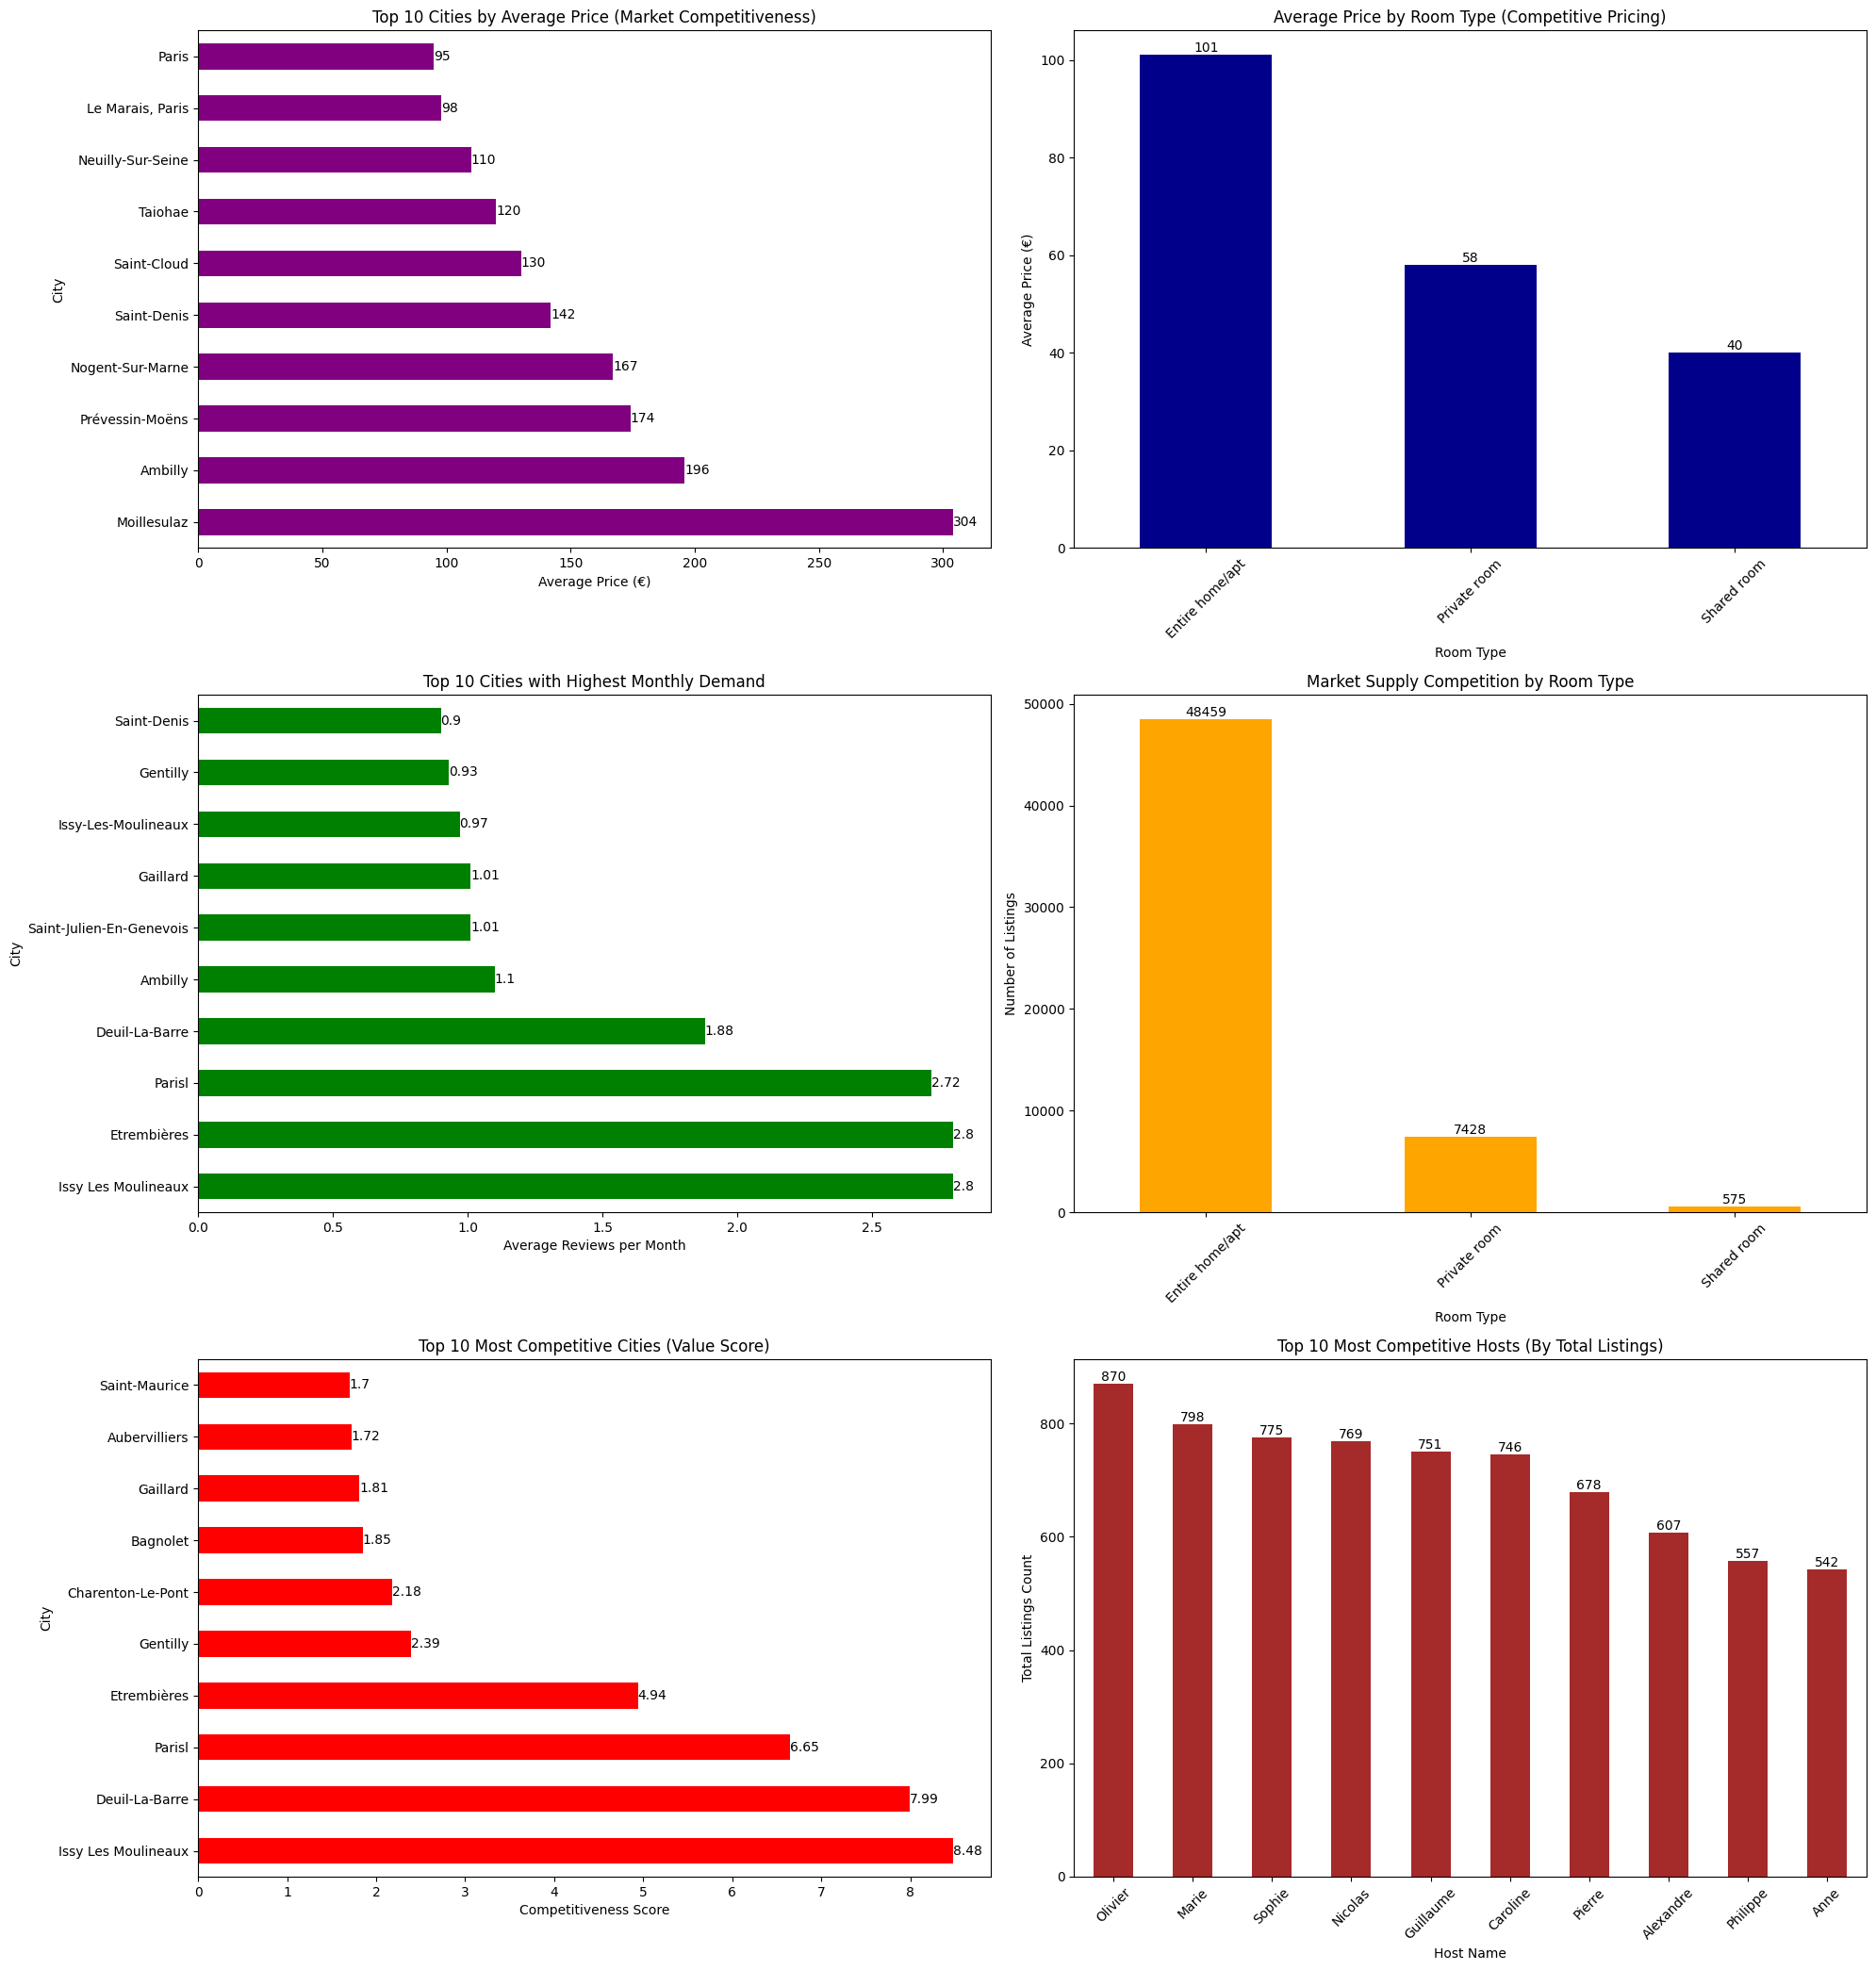

In [36]:
plt.figure(figsize=(20,21))

# I. Average Price by City (Top 10 Competitive Cities)
plt.subplot(3,2,1)
plot1 = france_df.groupby("city")["price"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="purple")
plot1.bar_label(plot1.containers[0])
plt.title("Top 10 Cities by Average Price (Market Competitiveness)")
plt.xlabel("Average Price (€)")
plt.ylabel("City")

# II. Average Price by Room Type (Price Competitiveness)
plt.subplot(3,2,2)
plot2 = france_df.groupby("room_type")["price"].mean().round(0).sort_values(ascending=False).plot(kind="bar", color="darkblue")
plot2.bar_label(plot2.containers[0])
plt.title("Average Price by Room Type (Competitive Pricing)")
plt.xlabel("Room Type")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)

# III. Demand: Cities with Highest Reviews per Month
plt.subplot(3,2,3)
plot3 = france_df.groupby("city")["reviews_per_month"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot3.bar_label(plot3.containers[0])
plt.title("Top 10 Cities with Highest Monthly Demand")
plt.xlabel("Average Reviews per Month")
plt.ylabel("City")

# IV. Supply Competition: Number of Listings by Room Type
plt.subplot(3,2,4)
plot4 = france_df.groupby("room_type")["id"].count().sort_values(ascending=False).plot(kind="bar", color="orange")
plot4.bar_label(plot4.containers[0])
plt.title("Market Supply Competition by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)

# V. Competitiveness Score: (Rating * Reviews_per_month) / Price
france_df["competitiveness_score"] = (france_df["review_scores_rating"] * france_df["reviews_per_month"]) / france_df["price"]

plt.subplot(3,2,5)
plot5 = france_df.groupby("city")["competitiveness_score"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="red")
plot5.bar_label(plot5.containers[0])
plt.title("Top 10 Most Competitive Cities (Value Score)")
plt.xlabel("Competitiveness Score")
plt.ylabel("City")

# VI. Host Competitiveness: Large Hosts (Top 10 by Total Listings)
plt.subplot(3,2,6)
plot6 = france_df.groupby("host_name")["host_total_listings_count"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color="brown")
plot6.bar_label(plot6.containers[0])
plt.title("Top 10 Most Competitive Hosts (By Total Listings)")
plt.xlabel("Host Name")
plt.ylabel("Total Listings Count")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


## MARKET COMPETITIVENESS

Moillesulaz and Ambilly show the highest average prices, indicating premium demand in low-supply, high-value areas, while Paris remains competitive with moderate pricing due to high supply.

Entire homes dominate the market, with the highest listing volume and strong pricing power, whereas shared rooms remain low-cost and less competitive.

Cities like Issy-les-Moulineaux and Deuil-la-Barre show the strongest market competitiveness, combining high demand (reviews), strong pricing, and lower competition—making them ideal high-ROI locations for hosts.

# STATISTICAL ANALYSIS 

## HOST COUNT OVER THE YEARS – DOES IT INCREASE?

What are we testing?

We are testing whether the average number of hosts has increased over time, indicating platform growth.

H₀ (Null Hypothesis):
The average host count has not increased over the years.

H₁ (Alternative Hypothesis):
The average host count has increased over the years.

In [37]:
from scipy.stats import norm
import math

host_year_count = france_df.groupby("host_year")["host_name"].nunique()

sample_data = host_year_count.values

mu_0 = sample_data[0]
alpha = 0.05
n = len(sample_data)

x_bar = np.mean(sample_data)
s = np.std(sample_data)

# Z statistic
z_stat = (x_bar - mu_0) / (s / math.sqrt(n))
p_value = 1 - norm.cdf(z_stat)

if p_value <= alpha:
    print("Conclusion (p-value method): Reject the Null Hypothesis (H0).")
else:
    print("Conclusion (p-value method): Fail to Reject the Null Hypothesis (H0).")
    
# Critical value
z_critical = norm.ppf(1 - alpha)

print("Z-test for Host Count Growth Over Years")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Critical Z: {z_critical:.3f}")

if z_stat > z_critical:
    print("Reject H₀: Host count has significantly increased over years.")
else:
    print("Fail to Reject H₀: No significant increase in host count.")


Conclusion (p-value method): Reject the Null Hypothesis (H0).
Z-test for Host Count Growth Over Years
Z-statistic: 3.946
P-value: 0.000
Critical Z: 1.645
Reject H₀: Host count has significantly increased over years.


## CUSTOMER REVIEWS – HAVE REVIEWS INCREASED?

## What are we testing?

We test whether the average number of customer reviews per listing exceeds a reasonable benchmark, indicating increased engagement.

## Hypotheses

H₀: Average number of reviews is equal to the benchmark.

H₁: Average number of reviews is greater than the benchmark.

In [38]:
sample_data = france_df["number_of_reviews"].dropna()

mu_0 = 50      
alpha = 0.05
n = len(sample_data)

x_bar = np.mean(sample_data)
s = np.std(sample_data, ddof=1)

z_stat = (x_bar - mu_0) / (s / math.sqrt(n))
p_value = 1 - norm.cdf(z_stat)
z_critical = norm.ppf(1 - alpha)

if p_value <= alpha:
    print("Conclusion (p-value method): Reject the Null Hypothesis (H0).")
else:
    print("Conclusion (p-value method): Fail to Reject the Null Hypothesis (H0).")

print("Z-test for Customer Reviews")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if z_stat > z_critical:
    print("Reject H₀: Customer reviews have increased significantly.")
else:
    print("Fail to Reject H₀: No significant increase in reviews.")


Conclusion (p-value method): Fail to Reject the Null Hypothesis (H0).
Z-test for Customer Reviews
Z-statistic: -280.623
P-value: 1.000
Fail to Reject H₀: No significant increase in reviews.


## Room Type vs Amenity Count 
## What are we testing?

We are testing whether different room types provide different numbers of amenities.
Specifically, the analysis compares Entire home/apartment listings with Private room listings to determine if one room type offers more facilities than the other.

## Hypotheses

Null Hypothesis (H₀):
The average number of amenities offered by Entire home/apartment listings is equal to that offered by Private room listings.

Alternative Hypothesis (H₁):
The average number of amenities offered by Entire home/apartment listings is greater than that offered by Private room listings.

In [39]:
from scipy import stats

france_df["amenity_count"] = france_df["amenities"].apply(lambda x: len(str(x).split(",")) if pd.notna(x) else 0)

entire_amenities = france_df[
    france_df["room_type"] == "Entire home/apt"
]["amenity_count"].dropna()

private_amenities = france_df[
    france_df["room_type"] == "Private room"
]["amenity_count"].dropna()

t_statistic, p_value_two_tailed = stats.ttest_ind(
    entire_amenities,
    private_amenities,
    equal_var=False
)

p_value_one_tailed = p_value_two_tailed / 2
alpha = 0.05

print("T-test for Room Type vs Amenity Count")
print("------------------------------------")
print(f"Mean Amenities (Entire home): {entire_amenities.mean():.2f}")
print(f"Mean Amenities (Private room): {private_amenities.mean():.2f}")
print(f"T-statistic: {t_statistic:.3f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

if p_value_one_tailed < alpha and t_statistic > 0:
    print("Reject H₀: Entire homes offer significantly more amenities.")
else:
    print("Fail to Reject H₀: No significant difference in amenity count.")


T-test for Room Type vs Amenity Count
------------------------------------
Mean Amenities (Entire home): 13.27
Mean Amenities (Private room): 12.62
T-statistic: 11.625
One-tailed p-value: 0.0000
Reject H₀: Entire homes offer significantly more amenities.


## Number of Reviews Over the Years 
## What are we testing?

We are testing whether the average number of customer reviews has increased over the years, which indicates growing demand and platform engagement over time.

## Hypotheses

Null Hypothesis (H₀):
The average number of reviews has not increased over the years and remains equal to a historical benchmark.

Alternative Hypothesis (H₁):
The average number of reviews has increased over the years.

In [40]:
reviews_by_year = france_df.groupby("host_year")["number_of_reviews"].mean().dropna()

sample_data = reviews_by_year.values

mu_0 = sample_data[0]     
alpha = 0.05
n = len(sample_data)

x_bar = np.mean(sample_data)
s = np.std(sample_data, ddof=1)

z_stat = (x_bar - mu_0) / (s / math.sqrt(n))

p_value = 1 - norm.cdf(z_stat)

if p_value <= alpha:
    print("Conclusion (p-value method): Reject the Null Hypothesis (H0).")
else:
    print("Conclusion (p-value method): Fail to Reject the Null Hypothesis (H0).")

z_critical = norm.ppf(1 - alpha)

print("Z-test for Number of Reviews Over the Years")
print("------------------------------------------")
print(f"Benchmark Mean (Base Year): {mu_0:.2f}")
print(f"Overall Mean Reviews: {x_bar:.2f}")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical Z-value: {z_critical:.3f}")

if z_stat > z_critical:
    print("Reject H₀: Number of reviews has increased significantly over the years.")
else:
    print("Fail to Reject H₀: No significant increase in number of reviews over the years.")


Conclusion (p-value method): Fail to Reject the Null Hypothesis (H0).
Z-test for Number of Reviews Over the Years
------------------------------------------
Benchmark Mean (Base Year): 76.83
Overall Mean Reviews: 25.21
Z-statistic: -7.648
P-value: 1.0000
Critical Z-value: 1.645
Fail to Reject H₀: No significant increase in number of reviews over the years.


## Host Analysis Analysis

What are we testing?

We are testing whether the average host response rate is significantly higher than a predefined service benchmark.
This helps evaluate whether hosts on the platform are responding promptly to guest inquiries, which is a key indicator of service quality and customer satisfaction.

## Hypotheses

Null Hypothesis (H₀):
The average host response rate is equal to or less than the benchmark value (90%).

Alternative Hypothesis (H₁):
The average host response rate is greater than the benchmark value of 90%.

In [41]:
sample_data = france_df["host_response_rate"].dropna().astype(float)

mu_0 = 90      
alpha = 0.05
n = len(sample_data)

x_bar = np.mean(sample_data)
s = np.std(sample_data)

z_stat = (x_bar - mu_0) / (s / math.sqrt(n))

p_value = 1 - norm.cdf(z_stat)

if p_value <= alpha:
    print("Conclusion (p-value method): Reject the Null Hypothesis (H0).")
else:
    print("Conclusion (p-value method): Fail to Reject the Null Hypothesis (H0).")

z_critical = norm.ppf(1 - alpha)

print("Z-test for Host Response Rate")
print("-----------------------------")
print(f"Sample Mean Response Rate: {x_bar:.2f}%")
print(f"Benchmark Response Rate: {mu_0}%")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if z_stat > z_critical:
    print("Reject H₀: Host response rate exceeds service benchmark.")
else:
    print("Fail to Reject H₀: Host response rate does not exceed benchmark.")

Conclusion (p-value method): Reject the Null Hypothesis (H0).
Z-test for Host Response Rate
-----------------------------
Sample Mean Response Rate: 94.39%
Benchmark Response Rate: 90%
Z-statistic: 60.819
P-value: 0.0000
Reject H₀: Host response rate exceeds service benchmark.


# MACHINE LEARNING 

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Encoding France 

In [43]:

france_encoded = france_df.copy()
categorical_cols = france_encoded.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in categorical_cols:
    france_encoded[col] = le.fit_transform(france_encoded[col].astype(str))

# SIMPLE LINEAR REGRESSION 

## CUSTOMER ANALYSIS

In [44]:
features = ['accommodates']

target = 'price'

data = france_encoded[features + [target]].dropna()

X = data[features]
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Simple Linear Regression Results ---")
print(f"RMSE: {rmse:.2f}")
print("MAE :", round(mae, 2))
print(f"R² Score: {r2:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope (Coefficient): {model.coef_[0]:.2f}")

--- Simple Linear Regression Results ---
RMSE: 64.06
MAE : 37.33
R² Score: 0.2918
Intercept: 93.97
Slope (Coefficient): 39.95


## 📊 Simple Linear Regression: Price vs Accommodation Capacity

The model shows a moderate relationship between accommodation capacity and price, with an R² value of 0.29, indicating that approximately 29% of the variation in listing prices can be explained by the number of guests a property can accommodate.

The slope coefficient (~39.95) indicates that for each additional guest capacity, the listing price increases by approximately 40 units, showing a clear positive relationship between accommodation size and price.

The RMSE value of 64.06 suggests a moderate prediction error, meaning the predicted prices typically deviate from actual prices by around 64 units.

The MAE of 37.33 further confirms that, on average, predictions differ from actual prices by about 37 units, reflecting reasonable but not highly precise performance.

Overall, while accommodation capacity is an important factor influencing price, the relatively modest R² value indicates that other variables such as location, amenities, and property type also play a significant role in determining listing prices

# MULTI LINEAR REGRESSION 

## Properties Analysis

In [45]:
features = ["accommodates","bedrooms","bathrooms","cleaning_fee",]

target = "price"

data = france_df[features + [target]].dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# prediction
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Multi Linear Regression")
print("--------------------------------")
print("RMSE:", round(rmse, 2))
print("MAE :", round(mae, 2))
print("R² Score:", round(r2, 4))

coefficients = pd.DataFrame({'Feature': features, 'Coefficient (Slope)': model.coef_})
print("\n--- Feature Coefficients ---")
print(coefficients.sort_values(by='Coefficient (Slope)', ascending=False))


Multi Linear Regression
--------------------------------
RMSE: 57.1
MAE : 33.4
R² Score: 0.4373

--- Feature Coefficients ---
        Feature  Coefficient (Slope)
0  accommodates            19.120995
2     bathrooms            16.460206
1      bedrooms            15.653384
3  cleaning_fee            13.685632


# Property wise Price Analysis 

The model demonstrates moderate predictive strength, with an R² value of approximately 0.44, indicating that around 44% of the variation in property prices can be explained using property-related features such as capacity, size, and amenities.

Accommodation capacity (accommodates) emerges as the most influential factor, showing that properties capable of hosting more guests tend to command significantly higher prices.

Bathrooms and bedrooms also contribute positively to price, confirming that larger and better-equipped properties are priced higher in the market.

Cleaning fee shows a meaningful positive effect, suggesting that properties with higher maintenance or service costs typically charge more per stay.

Although the model captures key pricing drivers, the remaining unexplained variance indicates that location, neighborhood demand, seasonality, and host reputation also play important roles in determining listing prices.

# LOGISTIC REGRESSION 

## Room Type Analysis

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

features = ['bedrooms','beds','bathrooms',"accommodates", 'price', 'amenity_count']

target = "room_type"

data = france_encoded[features + [target]].dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression() 
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", round(roc_auc, 4))


Accuracy: 0.8753

Confusion Matrix:
 [[9557  132    3]
 [1172  313    1]
 [  51   49   15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93      9692
           1       0.63      0.21      0.32      1486
           2       0.79      0.13      0.22       115

    accuracy                           0.88     11293
   macro avg       0.77      0.44      0.49     11293
weighted avg       0.85      0.88      0.85     11293

ROC-AUC Score: 0.8844


## 🧠 Room Type Classification - Logistic Regression Model

The model achieves an overall accuracy of 87.5%, indicating that it can correctly classify room types in most cases based on property features such as bedrooms, bathrooms, capacity, and amenities.

The ROC–AUC score of 0.8844 shows that the model has a strong ability to distinguish between different room types, confirming good class separation performance.

The model performs very well for the majority class (Class 0), achieving high precision (0.89) and recall (0.99), meaning it correctly identifies most common room types.

Performance for minority classes (Class 1 and Class 2) is lower, with reduced recall values, indicating that fewer minority-class listings are correctly predicted. This is expected due to class imbalance in the dataset.

Overall, the results show that property features such as number of rooms, bathrooms, and amenities are strong indicators of room type, but class imbalance limits prediction accuracy for less frequent categories.

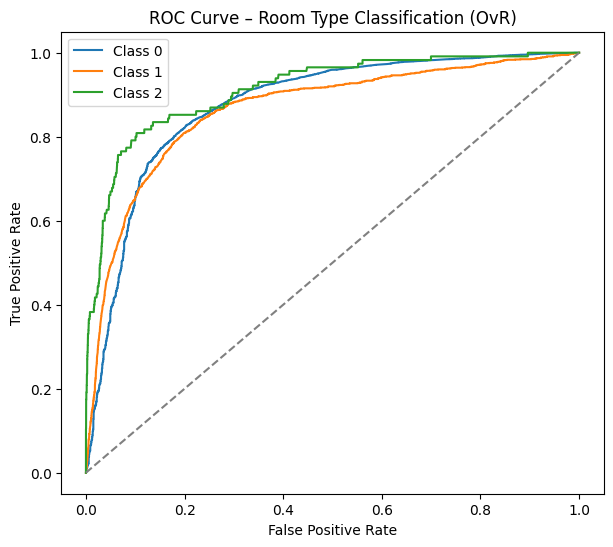

In [47]:
plt.figure(figsize=(7,6))

for i, cls in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test == cls, y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls}")

plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Room Type Classification (OvR)")
plt.legend()
plt.show()


In [48]:
from sklearn.neighbors import KNeighborsClassifier

features = ['bedrooms','beds','bathrooms',"accommodates", 'price', 'amenity_count']

target = 'room_type'

data = france_encoded[features + [target]].dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier (n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy,4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8901

Confusion Matrix:
 [[9378  312    2]
 [ 827  657    2]
 [  27   71   17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9692
           1       0.63      0.44      0.52      1486
           2       0.81      0.15      0.25       115

    accuracy                           0.89     11293
   macro avg       0.79      0.52      0.57     11293
weighted avg       0.88      0.89      0.88     11293



## 📊 K-Nearest Neighbors (KNN) – Model Interpretation

The model achieved an overall accuracy of 89%, indicating strong performance in predicting room types based on property features such as bedrooms, bathrooms, capacity, and amenities.

The majority class (Class 0) is predicted very well, with a high recall of 0.97, meaning most listings belonging to this class are correctly identified.

The model shows moderate performance for Class 1, with a recall of 0.44, suggesting that while some instances are correctly classified, others are confused with similar room types.

The minority class (Class 2) has the lowest recall (0.15), indicating difficulty in identifying rare room types due to limited data availability.

The weighted F1-score of 0.88 confirms that overall model performance is strong, but imbalance in class distribution affects prediction accuracy for less frequent categories.


# K - MEANS 

K = 2, Inertia = 79890.87, Silhouette = 0.615
K = 3, Inertia = 43749.76, Silhouette = 0.666
K = 4, Inertia = 33355.79, Silhouette = 0.523
K = 5, Inertia = 28529.14, Silhouette = 0.403
K = 6, Inertia = 19904.19, Silhouette = 0.442
K = 7, Inertia = 16320.43, Silhouette = 0.460
K = 8, Inertia = 14133.42, Silhouette = 0.458
K = 9, Inertia = 12492.72, Silhouette = 0.450
K = 10, Inertia = 11404.38, Silhouette = 0.456
K = 11, Inertia = 10428.00, Silhouette = 0.444


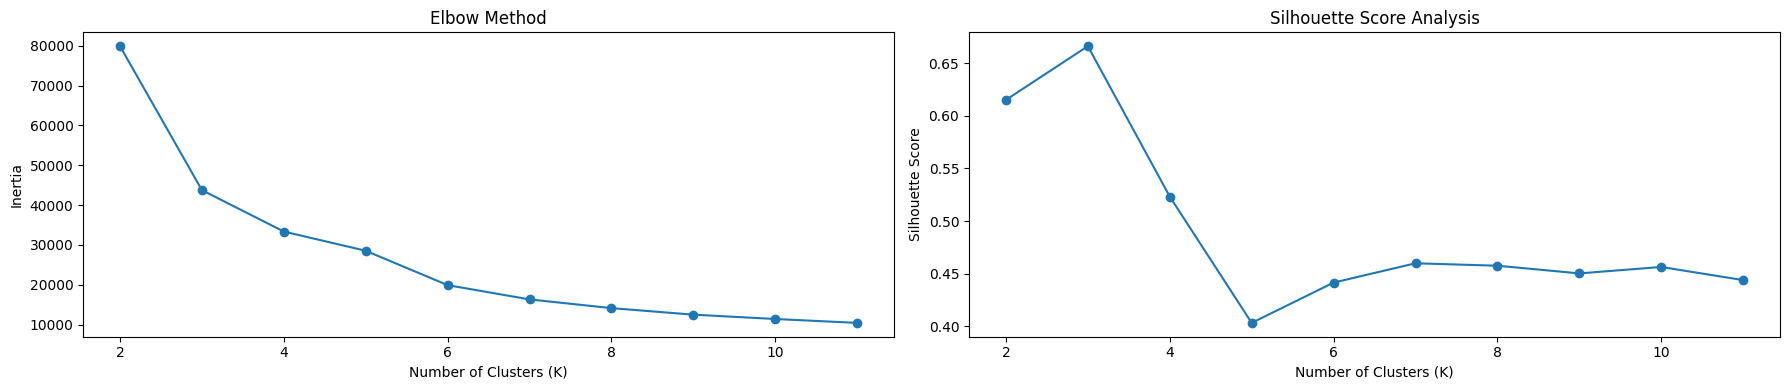

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#  Feature Selection

features = ['price', 'number_of_reviews']
data_clustering = france_encoded[features].dropna()

# 2. Scaling 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# 3. Finding Optimal K

inertia_scores = []
silhouette_scores = []

for k in range(2, 12):
    model = KMeans(n_clusters=k, random_state=3)
    labels = model.fit_predict(data_scaled)

    inertia_scores.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

    print(f"K = {k}, Inertia = {model.inertia_:.2f}, Silhouette = {silhouette_score(data_scaled, labels):.3f}")

# 4. Elbow 

plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.plot(range(2, 12), inertia_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

# 5. Silhouette Score 

plt.subplot(1,2,2)
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")

plt.tight_layout()
plt.show()


Cluster Distribution:
cluster
1.0    41566
3.0    10190
2.0     3216
0.0     1490
Name: count, dtype: int64

Cluster Centroids:
        price  number_of_reviews
0  409.354125          11.229376
1   66.398743           8.770912
2   88.422575         112.101679
3  164.176851           9.848120


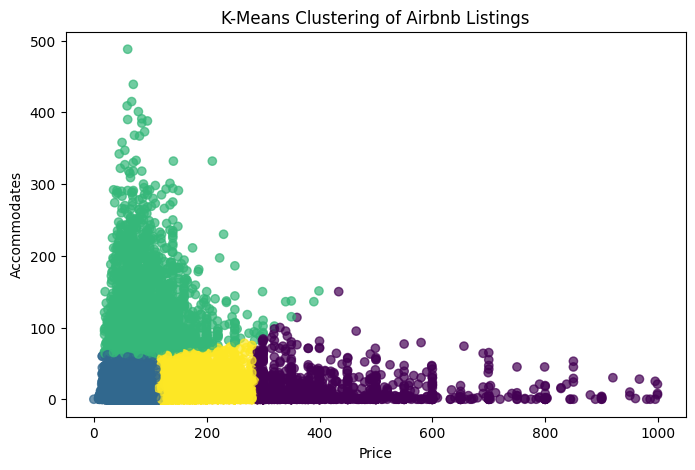

In [50]:

final_k = 4

final_model = KMeans(n_clusters=final_k, random_state=3)
cluster_labels = final_model.fit_predict(data_scaled)

france_encoded.loc[data_clustering.index, "cluster"] = cluster_labels

print("\nCluster Distribution:")
print(france_encoded["cluster"].value_counts())

centroids = pd.DataFrame(
    scaler.inverse_transform(final_model.cluster_centers_),
    columns=features
)

print("\nCluster Centroids:")
print(centroids)

plt.figure(figsize=(8, 5))
plt.scatter(
    data_clustering["price"],
    data_clustering["number_of_reviews"],
    c=cluster_labels,
    cmap="viridis",
    alpha=0.7
)
plt.xlabel("Price")
plt.ylabel("Accommodates")
plt.title("K-Means Clustering of Airbnb Listings")
plt.show()
